In [1]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle, glob
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
channel_list = ["Tracks_pt", "Tracks_dZSig", "Tracks_d0Sig", "ECAL_energy",
"HBHE_energy", "Pix_1", "Pix_2", "Pix_3", "Pix_4", "Tib_1", "Tib_2",
"Tib_3", "Tib_4", "Tob_1", "Tob_2", "Tob_3", "Tob_4", "Tob_5",
"Tob_6", "Tid_1", "Tec_1", "Tec_2", "Tec_3"]

from scipy.stats import norm
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

m0_scale    = 14
m0_min      = 3.6
m0_max      = 14.8
mtrue_bins = np.arange(m0_min, m0_max, .4)
mae_min  =0
mae_max  = 10.5
mae_bins = np.arange(mae_min, mae_max, .5)
mre_bins = np.arange(0, 1.05, .05)
mass_bins = np.arange(3600,14000,400)/1000.

# out_dir='plots'
# if not os.path.isdir(out_dir):
#     os.makedirs(out_dir)
# save = True

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-s6o9a3li because the default path (/uscms/home/bbbam/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [12]:
ls ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/13_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs15_BatchSize1024_from1_ntrain5296128_nval596992_run0/epoch10_val_pseudoscalar_mae1.8745_inference_data.pkl

../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/13_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs15_BatchSize1024_from1_ntrain5296128_nval596992_run0/epoch10_val_pseudoscalar_mae1.8745_inference_data.pkl


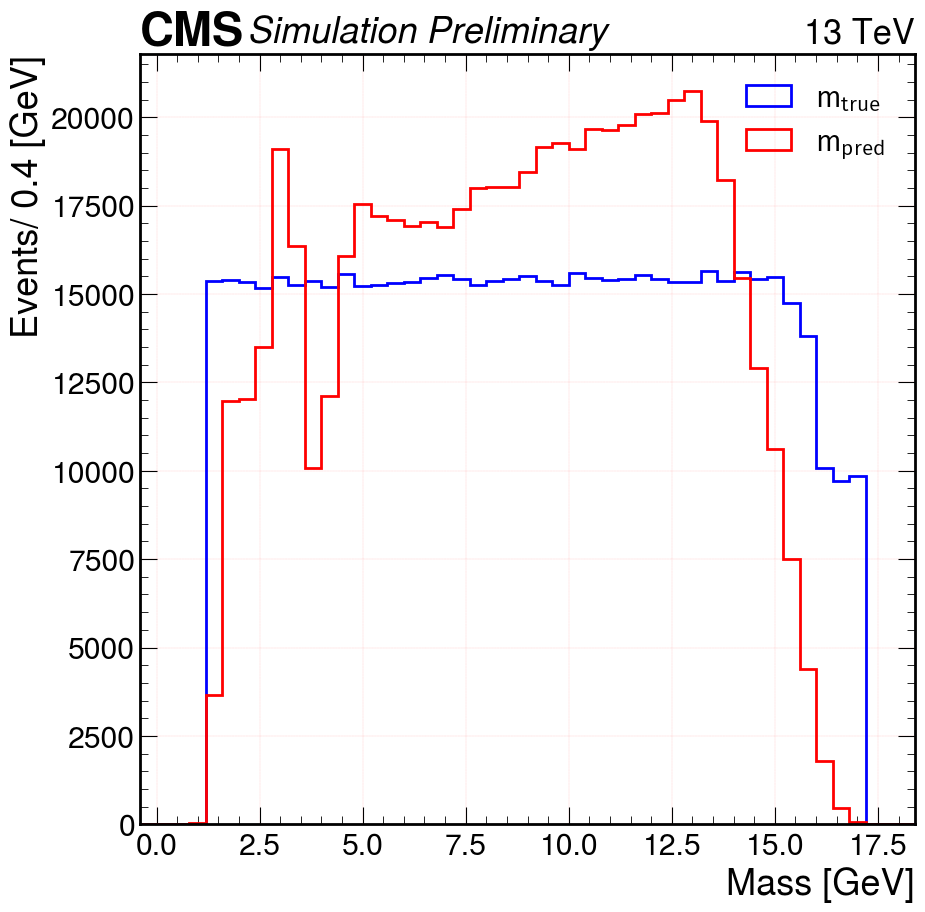

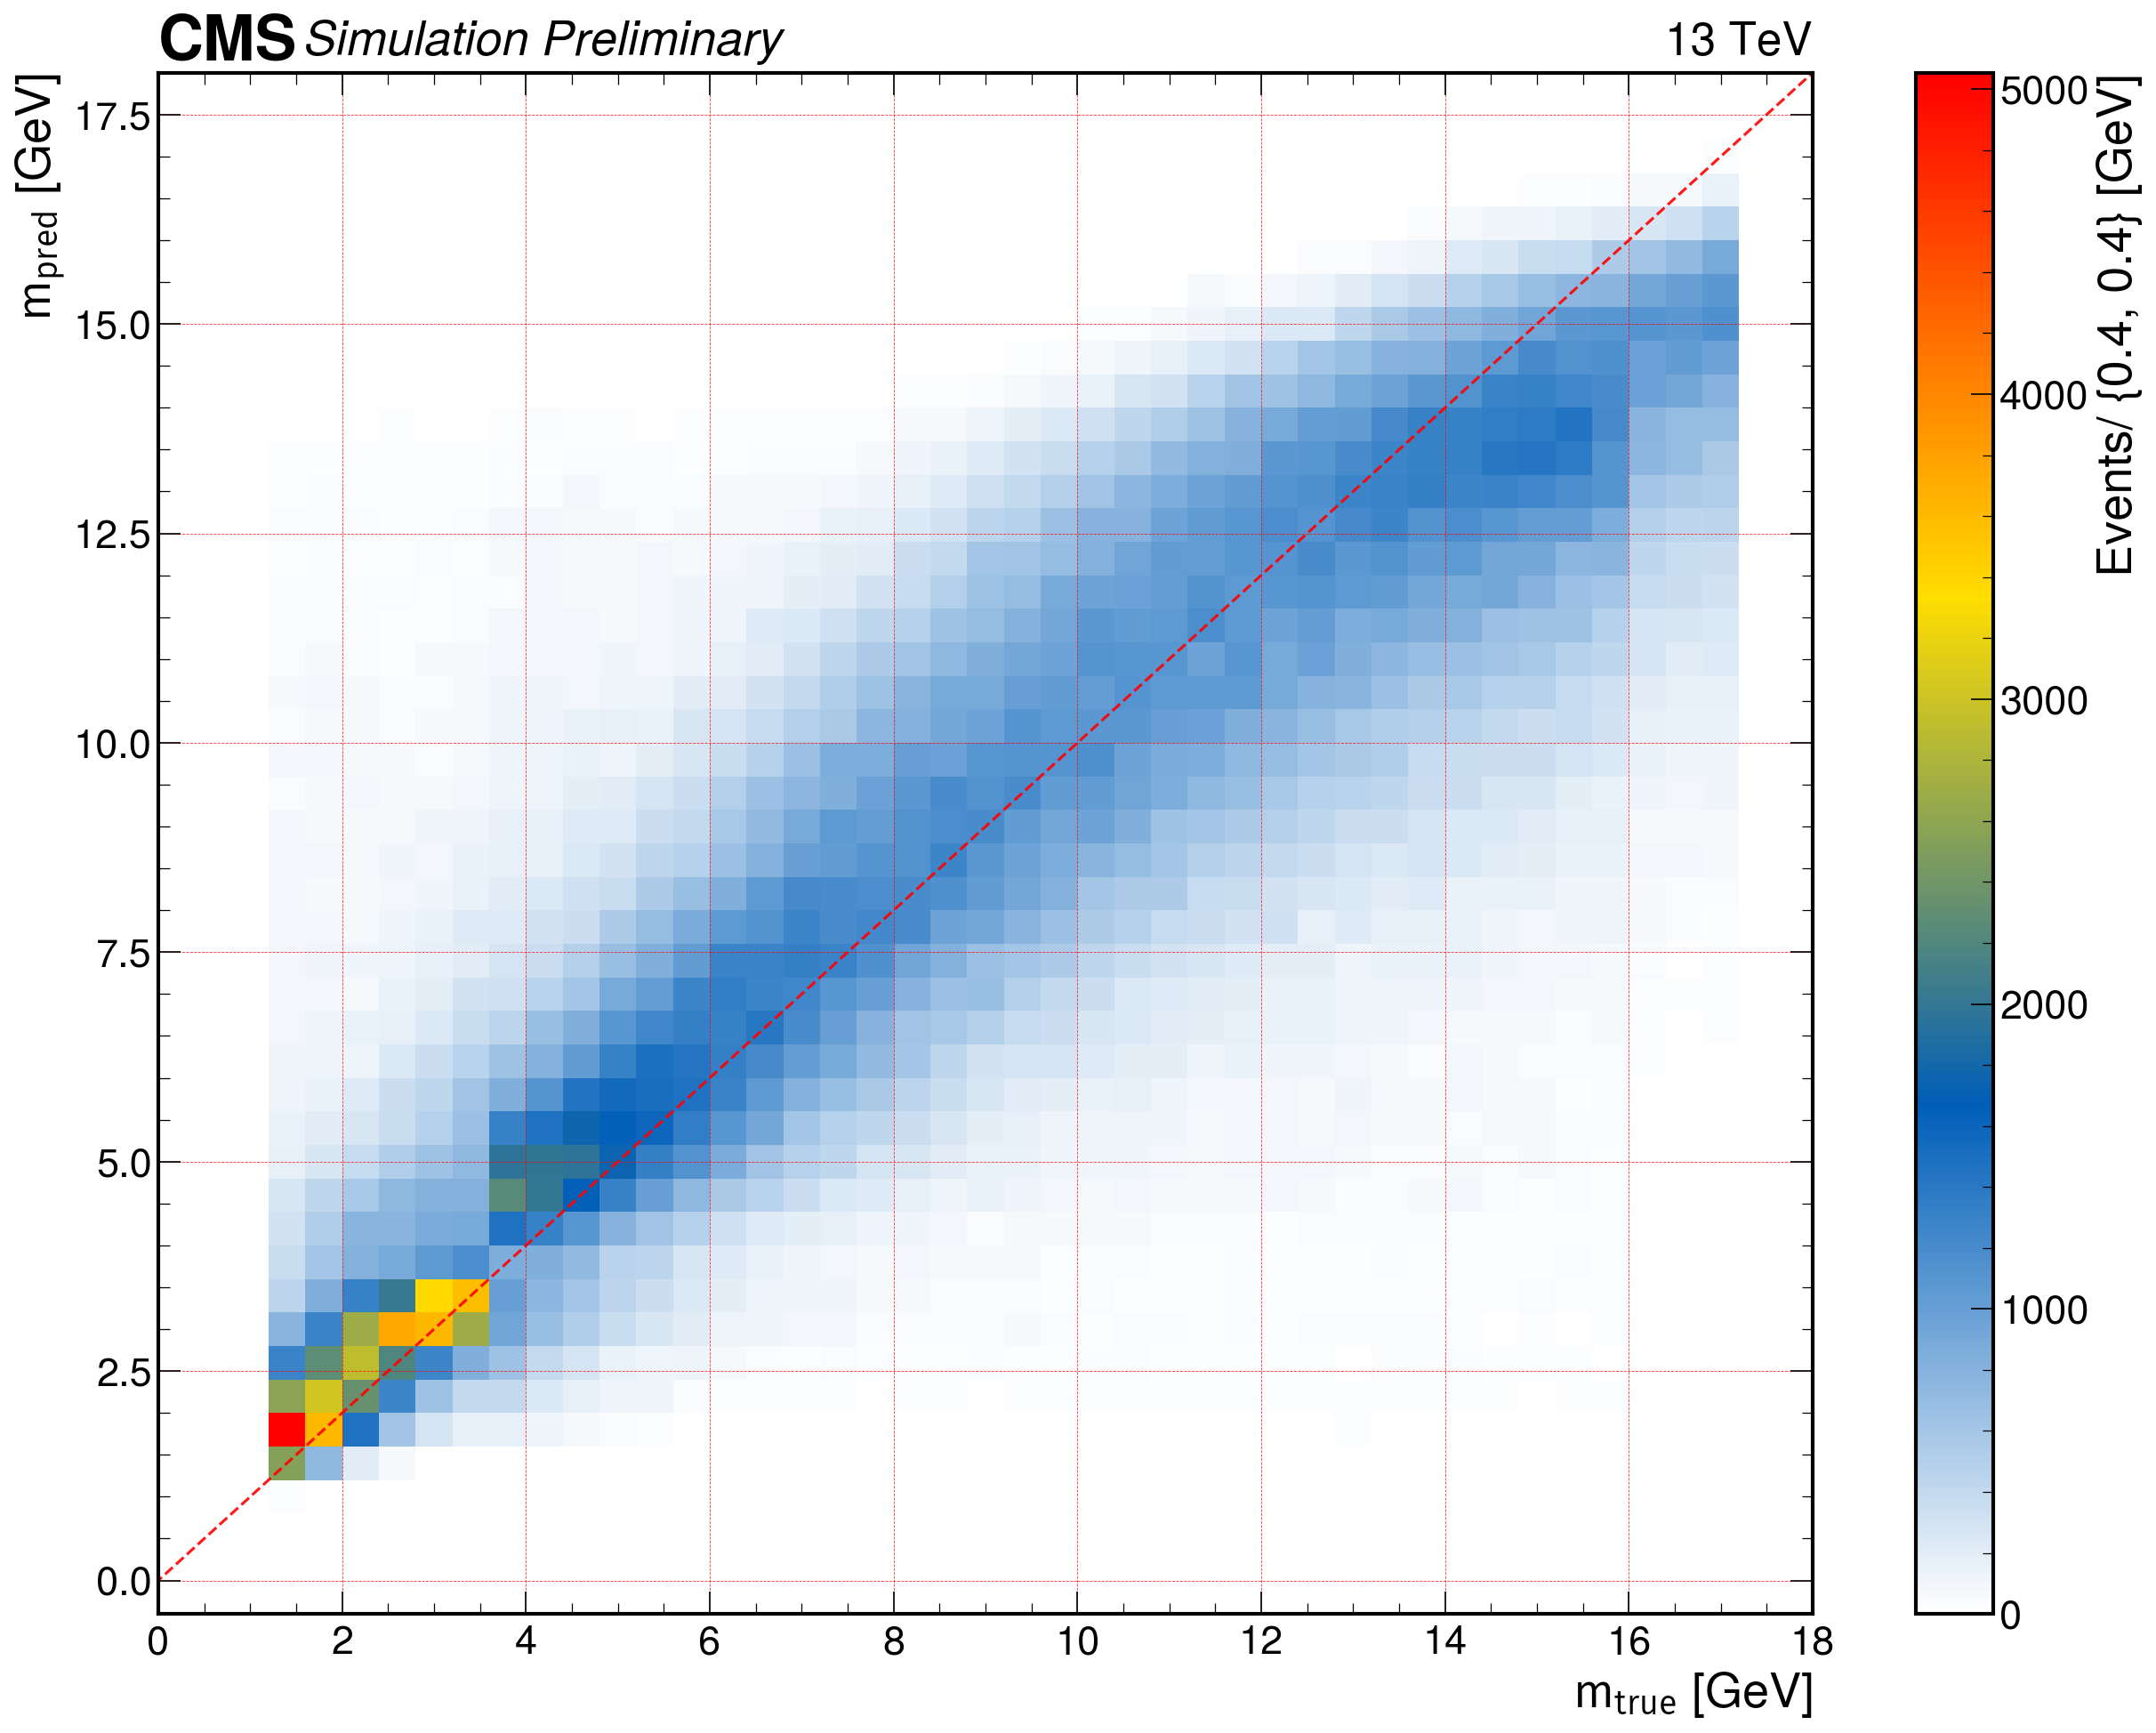

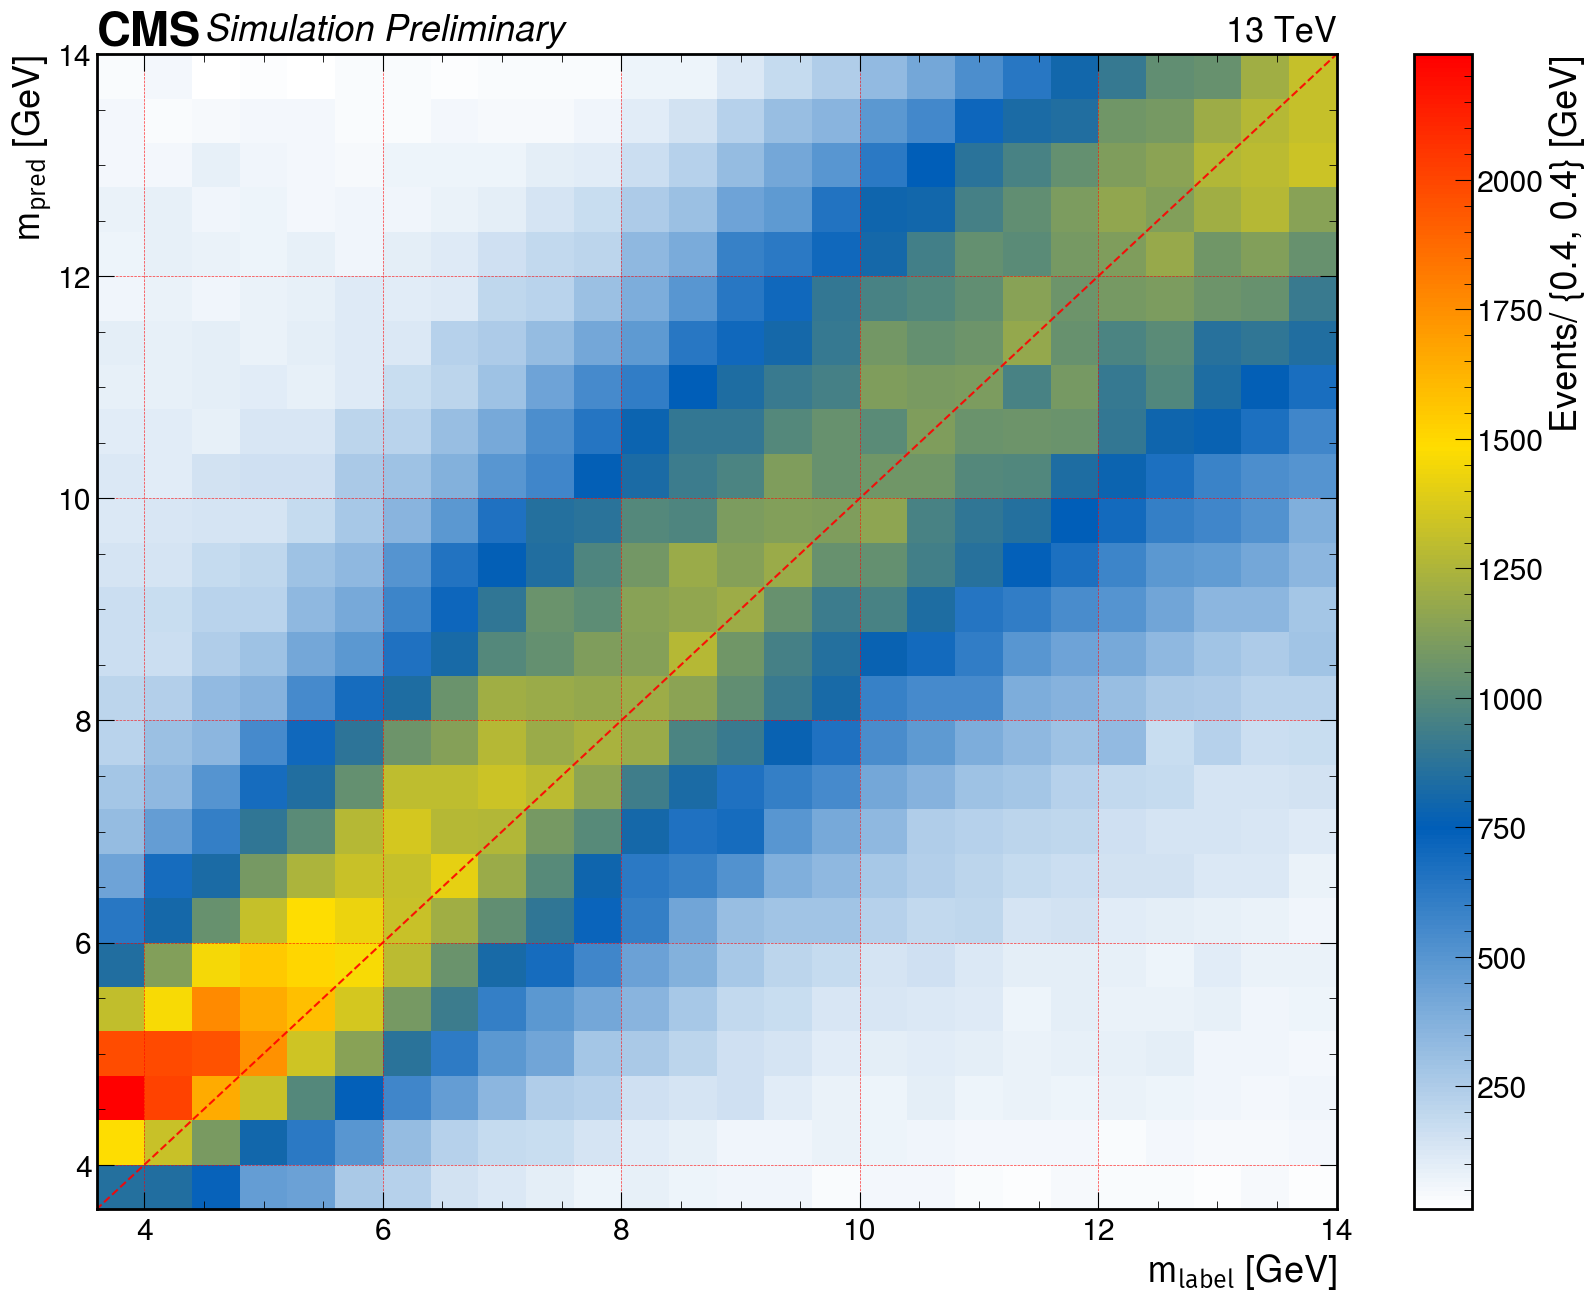

In [2]:
file_in ='../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/13_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs15_BatchSize1024_from1_ntrain5296128_nval596992_run0/epoch10_val_pseudoscalar_mae1.8745_inference_data.pkl'

infile = open(f"{file_in}", "rb")
data = pickle.load(infile)
infile.close()

m_true_=data["m_true"]
m_pred_=data["m_pred"]
m_true_ = np.concatenate(m_true_)
m_pred_ = np.concatenate(m_pred_)  


m0_min = 0.8
m0_max = 17.2
bin_size = 0.4
fig, ax = plt.subplots()
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
# plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()



# Extended version
fig, ax = plt.subplots(figsize=(20,15), dpi=150)
plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
# plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
# plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary ", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Truncated version
fig, ax = plt.subplots(figsize=(20,15))
hist = plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
# plt.xticks(np.arange(3.6, 14.1, .8),size=15)
# plt.yticks(np.arange(3.6, 14.1, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
plt.grid(color='r', linestyle='--', linewidth=.5)

hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()
exit


In [15]:
data.keys()

dict_keys(['m_true', 'm_pred', 'mae', 'mre'])

# --------------- Test on signals signal------------------

12
1 files found
keys----- dict_keys(['m_true', 'm_pred', 'mae', 'mre', 'm0'])


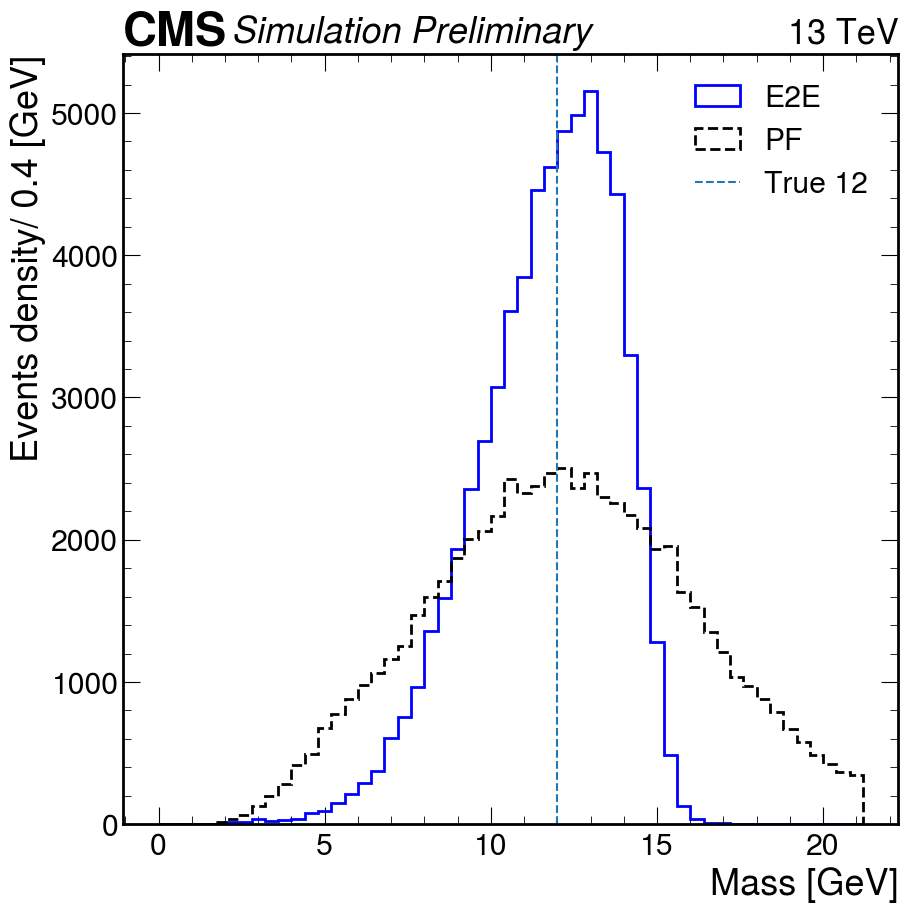

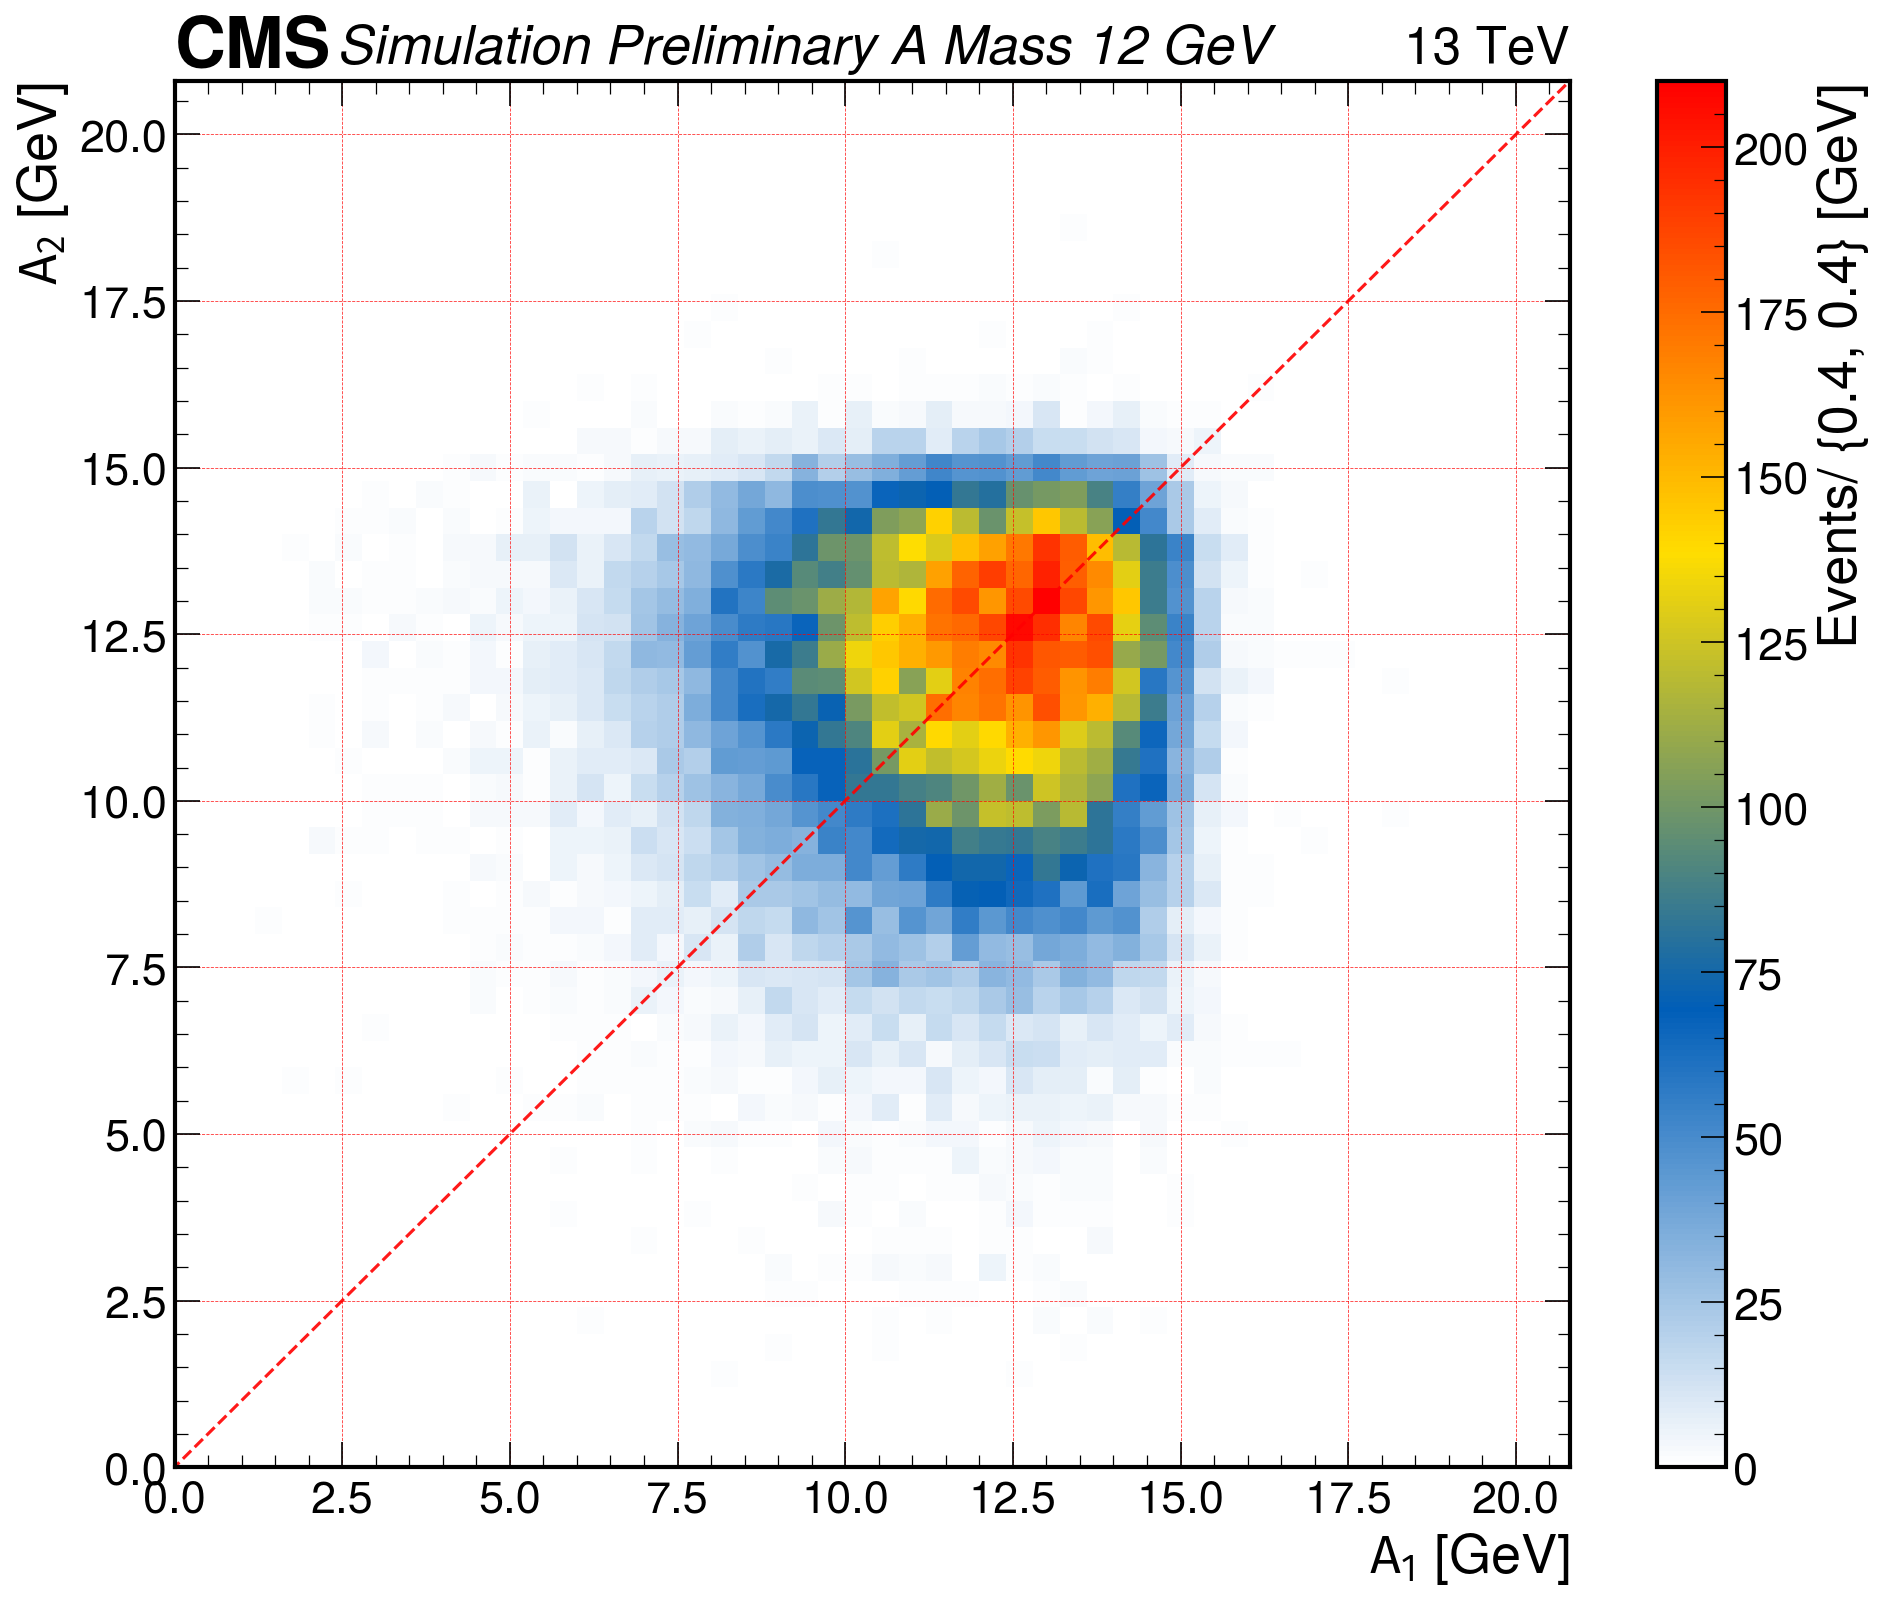

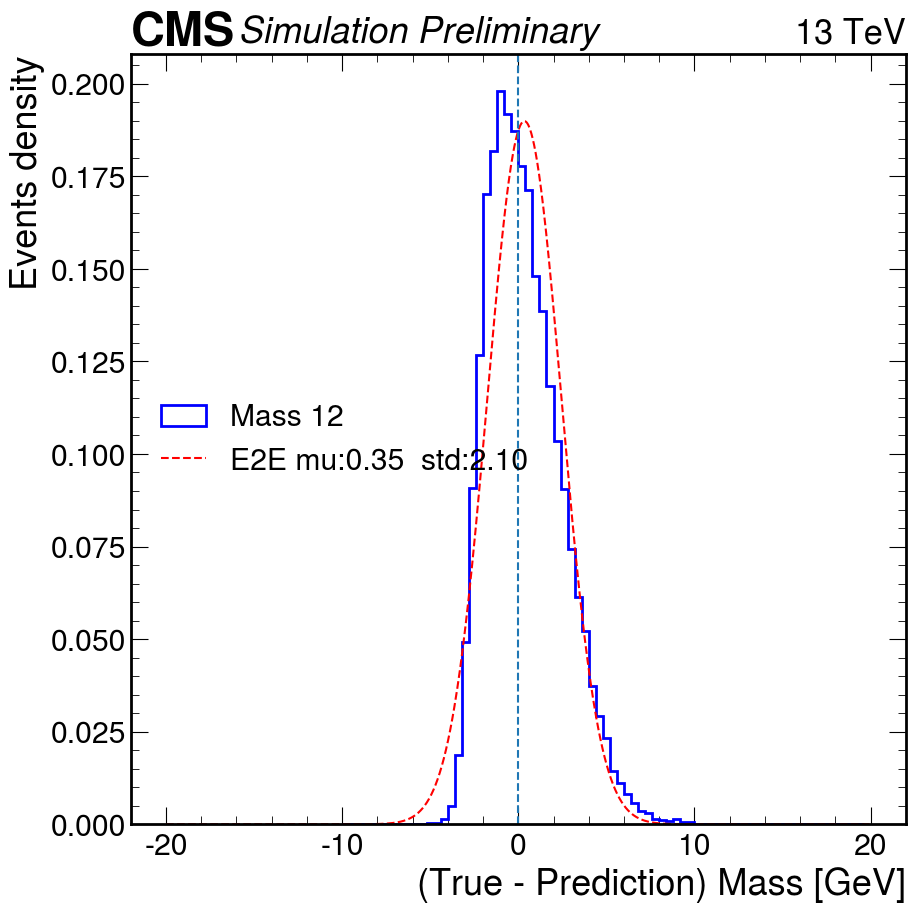

In [32]:
Mass = '12'
mass  = {'3p7':3.7,'4':4, '5':5, '6':6, '8':8, '10':10, '12':12, '14':14}.get(Mass, None)
print(mass)
paths=np.sort(glob.glob(f'../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_{Mass}_H_AA_4Tau/epoch10_val_pseudoscala*.pkl'))
assert len(paths) > 0
print(f"{len(paths)} files found")

m0_min = 0.8
m0_max = 17.2
bin_size = 0.4




infile = open(f"{paths[0]}", "rb")
data = pickle.load(infile)
print("keys-----", data.keys())
infile.close()
m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
m0_ = data["m0"]

m0 = 1.2
m0_max = 20
bin_size=0.4
mu, std = norm.fit(m_pred_)
x = np.linspace(0,m0_max+1.2, num=1000)
y = norm.pdf(x, mu, std)

fig, ax = plt.subplots()
plt.hist(np.array(m_pred_).flatten(), range=(0,m0_max+1.2), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='-', color='b', linewidth=2, label='E2E')
plt.hist(np.array(m0_).flatten(), range=(0,m0_max+1.2), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='--', color='black', linewidth=2, label='PF')
# plt.plot(x, y,linestyle='--', color='red',label=f'E2E mu:{mu:.2f}  std:{std:.2f}')
plt.axvline(x= mass,linestyle='--',label=f'True {Mass}')
plt.xlabel('Mass [GeV]')
plt.ylabel('Events density/ 0.4 [GeV]')
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.show() 

m_pred_1 =[]
m_pred_2 =[]

for i in range(len(m_pred_)): 
    try:
        if i%2: m_pred_1.append(m_pred_[i])
        else: m_pred_2.append(m_pred_[i])
    except:
        if i==0: continue
        if i%2: m_pred_1.append(m_pred_[i])
        else: m_pred_2.append(m_pred_[i])
    

fig, ax = plt.subplots(figsize=(15,12), dpi=150)
plt.hist2d(np.squeeze(m_pred_1), np.squeeze(m_pred_2), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-0.8, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{A_{1}}$ [GeV]')
plt.ylabel(r'$\mathrm{A_{2}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
# plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=12)
# plt.yticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=12)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary A Mass {mass} GeV", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()  

residuals = m_true_ - m_pred_
mu, std = norm.fit(residuals)
x = np.linspace(-20,20, num=1000)
y = norm.pdf(x, mu, std)

fig, ax = plt.subplots()
plt.hist(np.squeeze(residuals),bins=np.arange(-10, 20, .4),density=True, histtype='step',  linestyle='-', color='b', linewidth=2, label=f"Mass {Mass}")
plt.plot(x, y,linestyle='--', color='red',label=f'E2E mu:{mu:.2f}  std:{std:.2f}')
plt.axvline(x= 0,linestyle='--')
plt.xlabel('(True - Prediction) Mass [GeV]')
plt.ylabel('Events density')
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.show() 

### Gaussian fit to prediction

In [76]:
mass = '5'
Mass = 5
local=f'../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_{mass}_H_AA_4Tau'
rhFileList = '%s/epoch10_val_pseudoscala*.pkl'%(local)
paths = np.sort(glob.glob(rhFileList))
assert len(paths) > 0
print(f"{len(paths)} files found")

1 files found


loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_5_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.9787_inference_data.pkl


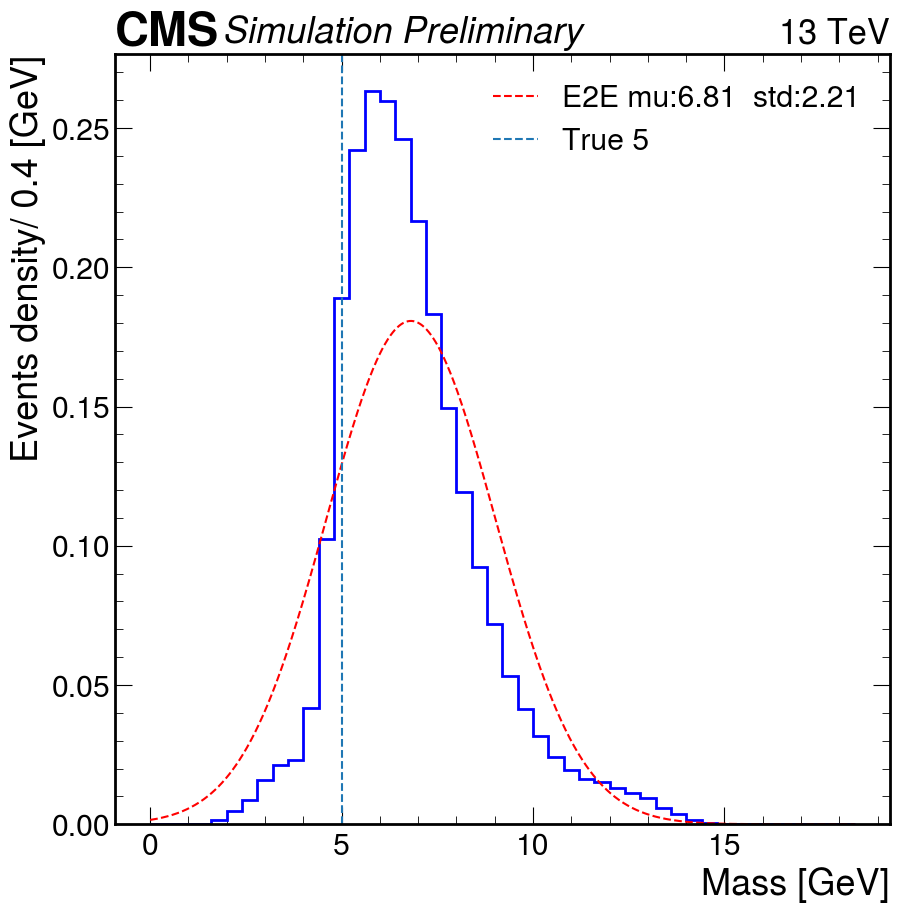

In [77]:
epoch=5

data_file = paths[0]
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
mae_ = data["mae"]
mre_ = data["mre"]
m0 = 1.2
m0_max = 17.2
bin_size=0.4
mu, std = norm.fit(m_pred_)
x = np.linspace(min(m_pred_),max(m_pred_), num=1000)
y = norm.pdf(x, mu, std)

fig, ax = plt.subplots()
plt.hist(np.array(m_pred_).flatten(),density=True, range=(0,m0_max+1.2), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='-', color='b', linewidth=2)
plt.plot(x, y,linestyle='--', color='red',label=f'E2E mu:{mu:.2f}  std:{std:.2f}')
plt.axvline(x= Mass,linestyle='--',label=f'True {mass}')
plt.xlabel('Mass [GeV]')
plt.ylabel('Events density/ 0.4 [GeV]')
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

### fitting gaussion to residuals

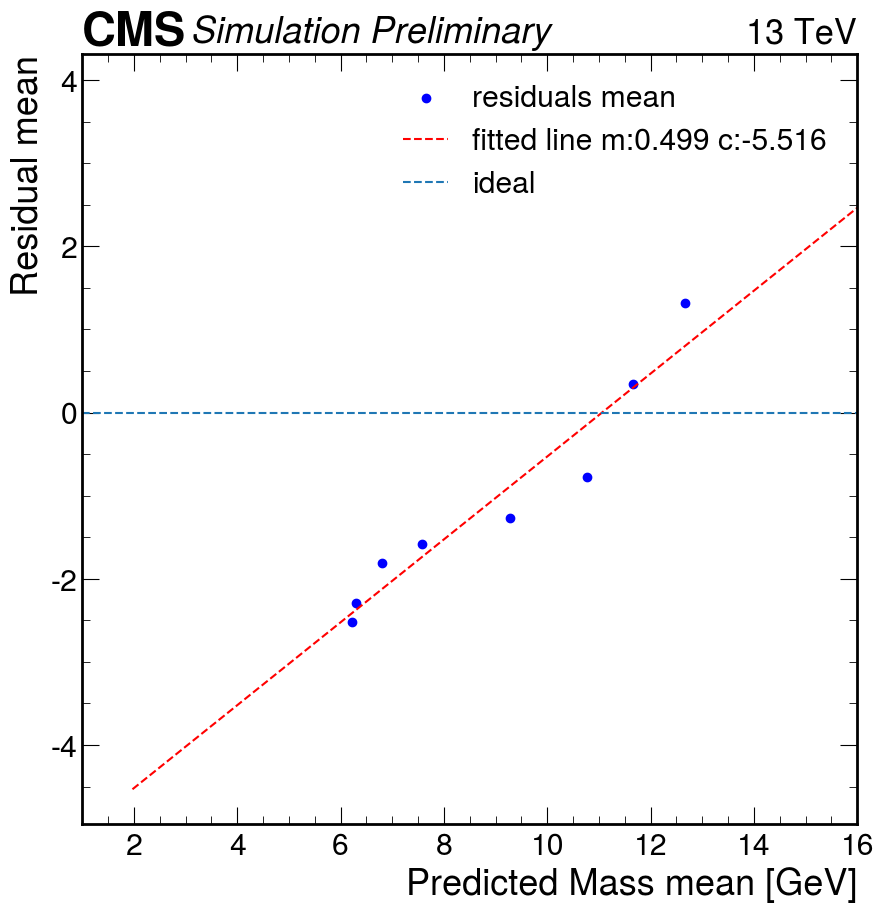

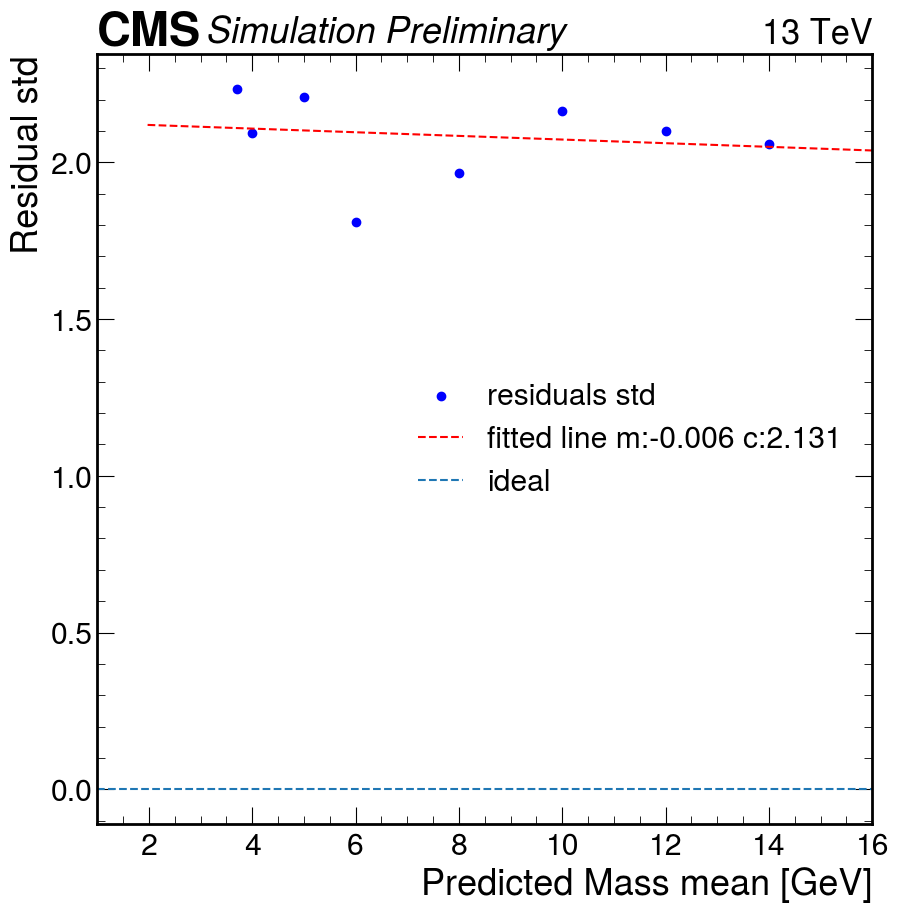

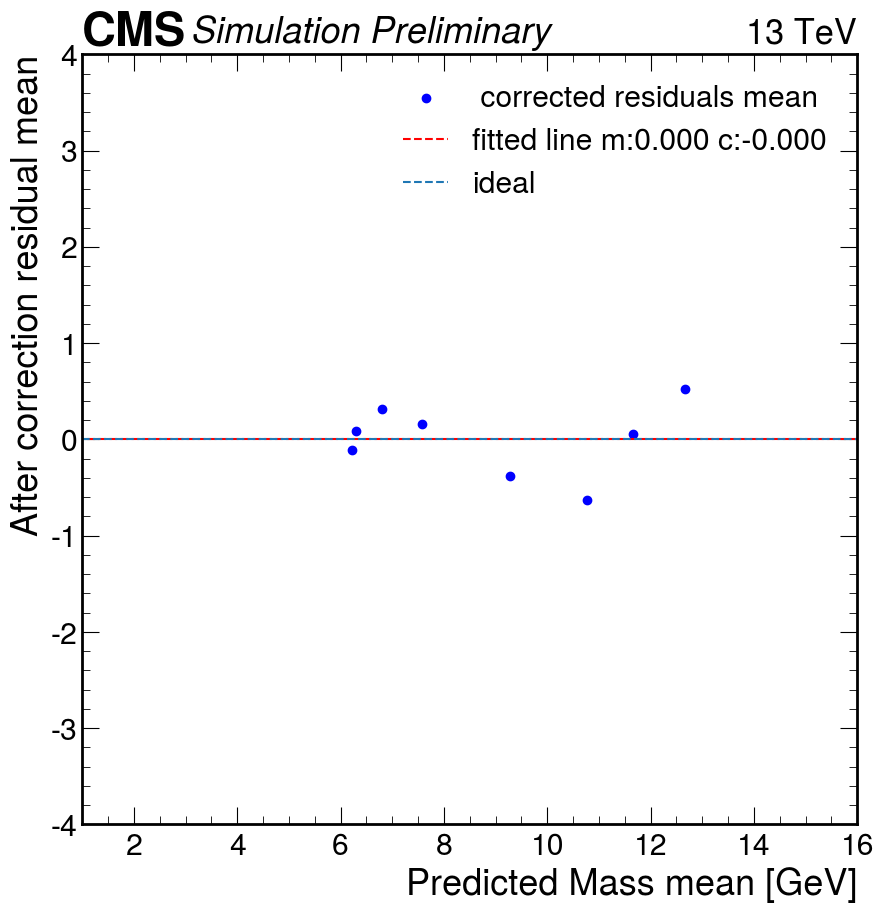

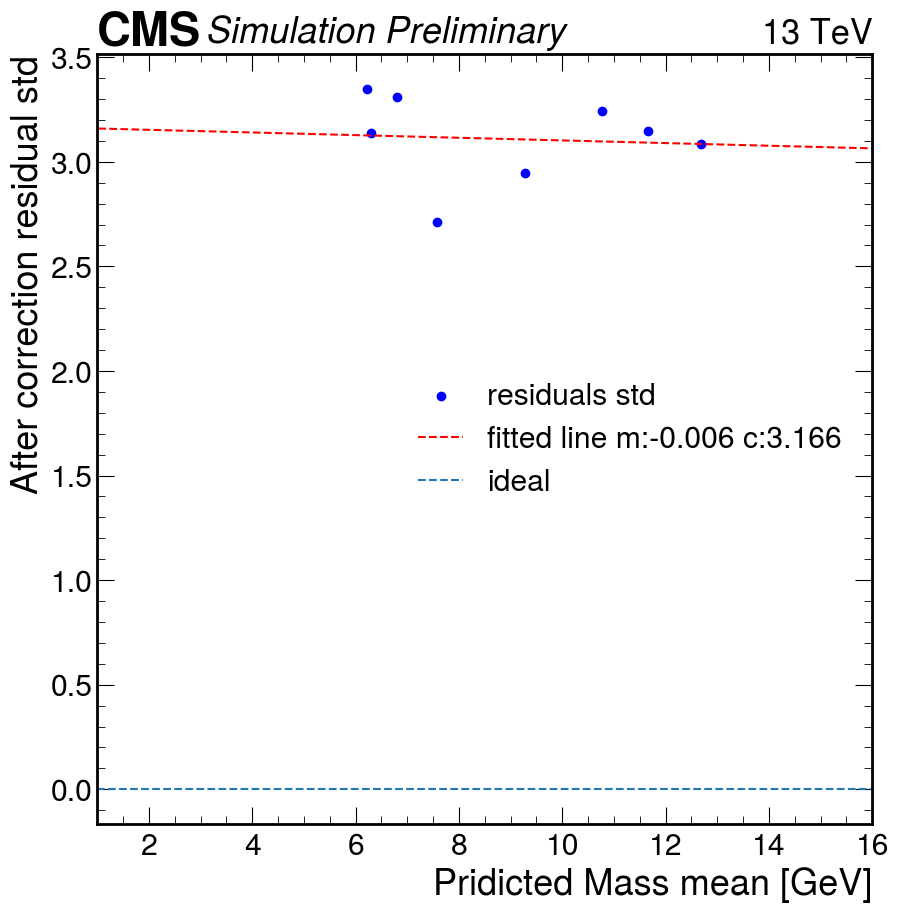

In [6]:
res_mean, res_std =[], []
pred_mean, pred_std = [], []
signal_mass = [3.7,4,5,6,8,10,12,14]
Mass_point = ['3p7','4','5','6','8','10','12','14']
for Mass in Mass_point:
    mass  = {'3p7':3.7,'4':4, '5':5, '6':6, '8':8, '10':10, '12':12, '14':14}.get(Mass, None)
    # print(mass)
    paths=np.sort(glob.glob(f'../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_{Mass}_H_AA_4Tau/epoch10_val_pseudoscala*.pkl'))
    assert len(paths) > 0
    # print(f"{paths}")

    infile = open(f"{paths[0]}", "rb")
    data = pickle.load(infile)
    infile.close()
    m_true = data["m_true"]
    m_pred = data["m_pred"]
    pred_mean.append(np.mean(m_pred))
    pred_std.append(np.std(m_pred))
    residuals = m_true - m_pred
    mu, std = norm.fit(residuals)
    res_mean.append(mu)
    res_std.append(std)
    
coeff_mean = np.polyfit(pred_mean, res_mean, 1)
polynomial_mean = np.poly1d(coeff_mean)
x = np.linspace(min(m_pred),max(m_pred), num=1000)
y_fit_mean = polynomial_mean(x)
fig, ax = plt.subplots()
plt.scatter(pred_mean, res_mean,color='b',marker='o',label='residuals mean')
plt.plot(x,y_fit_mean, color='r',linestyle='--', label = f"fitted line m:{coeff_mean[0]:.3f} c:{coeff_mean[1]:.3f}" )
plt.xlim(1,16)
plt.axhline(y=0, linestyle='--', label="ideal")
plt.xlabel("Predicted Mass mean [GeV]")
plt.ylabel("Residual mean")
plt.legend()
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.show() 


coeff_std = np.polyfit(pred_mean, res_std, 1)
polynomial_std = np.poly1d(coeff_std)
y_fit_std = polynomial_std(x)
fig, ax = plt.subplots()
plt.scatter(signal_mass,res_std,color='b',marker='o',label='residuals std')
plt.plot(x,y_fit_std, color='r',linestyle='--', label = f"fitted line m:{coeff_std[0]:.3f} c:{coeff_std[1]:.3f}" )
plt.xlim(1,16)
plt.axhline(y=0, linestyle='--', label="ideal")
plt.xlabel("Predicted Mass mean [GeV]")
plt.ylabel("Residual std")
plt.legend()
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.show() 







def corrected_pred(m):
    mass = m + polynomial_mean(m)
    return mass

res_mean, res_std =[], []
pred_orig, pred_mean, pred_std =[], [], []
for Mass in Mass_point:
    mass  = {'3p7':3.7,'4':4, '5':5, '6':6, '8':8, '10':10, '12':12, '14':14}.get(Mass, None)
    # print(mass)
    paths=np.sort(glob.glob(f'../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_{Mass}_H_AA_4Tau/epoch10_val_pseudoscala*.pkl'))
    assert len(paths) > 0
    # print(f"{paths}")

    infile = open(f"{paths[0]}", "rb")
    data = pickle.load(infile)
    infile.close()
    m_true = data["m_true"]
    m_pred = data["m_pred"]
    pred_orig.append(np.mean(m_pred))
    m_pred = corrected_pred(m_pred)
    pred_mean.append(np.mean(m_pred))
    pred_std.append(np.std(m_pred))
    
    residuals = m_true - m_pred
    mu, std = norm.fit(residuals)
    res_mean.append(mu)
    res_std.append(std)
    
coeff = np.polyfit(pred_mean, res_mean, 1)
polynomial = np.poly1d(coeff)
x = np.linspace(min(m_pred),max(m_pred), num=1000)
y_fit = polynomial(x)
fig, ax = plt.subplots()
plt.scatter(pred_orig,res_mean,color='b',marker='o',label=' corrected residuals mean')
plt.plot(x,y_fit, color='r',linestyle='--', label = f"fitted line m:{coeff[0]:.3f} c:{coeff[1]:.3f}" )
plt.xlim(1,16)
plt.ylim(-4,4)
plt.axhline(y=0, linestyle='--', label="ideal")
plt.xlabel("Predicted Mass mean [GeV]")
plt.ylabel("After correction residual mean")
plt.legend()
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.show() 


coeff1 = np.polyfit(signal_mass, res_std, 1)
polynomial1 = np.poly1d(coeff1)
y_fit1 = polynomial1(x)
fig, ax = plt.subplots()
plt.scatter(pred_orig,res_std,color='b',marker='o',label='residuals std')
plt.plot(x,y_fit1, color='r',linestyle='--', label = f"fitted line m:{coeff1[0]:.3f} c:{coeff1[1]:.3f}" )
plt.xlim(1,16)
plt.axhline(y=0, linestyle='--', label="ideal")
plt.xlabel("Pridicted Mass mean [GeV]")
plt.ylabel("After correction residual std")
plt.legend()
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.show() 

### Corrected pridictions

In [8]:
slope = -0.499
y_intercept = 5.516
def corrected_pred(m):
    mass = m + polynomial_mean(m)
    return mass



In [9]:
def plot_validation(corrected=False):
    file_in ='../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/13_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs15_BatchSize1024_from1_ntrain5296128_nval596992_run0/epoch10_val_pseudoscalar_mae1.8745_inference_data.pkl'
    infile = open(f"{file_in}", "rb")
    data = pickle.load(infile)
    infile.close()

    m_true_=data["m_true"]
    m_pred_=data["m_pred"]
    m_true_ = np.concatenate(m_true_)
    m_pred_ = np.concatenate(m_pred_)  
    if corrected: m_pred_ = corrected_pred(m_pred_)

    m0_min = 0.8
    m0_max = 17.2
    bin_size = 0.4
    fig, ax = plt.subplots()
    plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
    plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
    plt.xlim(m0_min-1.2,m0_max+1.2)
    # plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),)
    plt.grid(color='r', linestyle='--', linewidth=.1)
    plt.xlabel('Mass [GeV]')
    plt.ylabel('Events/ 0.4 [GeV]')
    # plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
    plt.legend(loc='upper right')
    hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
    # plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
    plt.show()



    # Extended version
    fig, ax = plt.subplots(figsize=(20,15), dpi=150)
    plt.hist2d(np.squeeze(m_true_),np.squeeze(m_pred_), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
    plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
    plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
    plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
    # plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
    # plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
    plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
    plt.grid(color='r', linestyle='--', linewidth=.4)
    hep.cms.label(llabel=f"Simulation Preliminary ", rlabel="13 TeV", loc=0, ax=ax)
    # plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
    plt.show()

    # Truncated version
    fig, ax = plt.subplots(figsize=(20,15))
    hist = plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)],cmap=cms_cmap)
    plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
    plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
    plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
    # plt.xticks(np.arange(3.6, 14.1, .8),size=15)
    # plt.yticks(np.arange(3.6, 14.1, .8),size=15)
    plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
    plt.grid(color='r', linestyle='--', linewidth=.5)

    hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
    # plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
    plt.show()
    


In [11]:
# plot_validation(corrected=True)

In [12]:
def plot_signal(Mass = '5', corrected=False):
    mass  = {'3p7':3.7,'4':4, '5':5, '6':6, '8':8, '10':10, '12':12, '14':14}.get(Mass, None)
    print("Signal Mass : ", mass)
    paths=np.sort(glob.glob(f'../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_{Mass}_H_AA_4Tau/epoch10_val_pseudoscala*.pkl'))
    assert len(paths) > 0
    # print(f"{len(paths)} files found")

    m0_min = 0.8
    m0_max = 17.2
    bin_size = 0.4




    infile = open(f"{paths[0]}", "rb")
    data = pickle.load(infile)
    # print("keys-----", data.keys())
    infile.close()
    m_true = data["m_true"]
    m_pred_ = data["m_pred"]
    m0_ = data["m0"]
    if corrected: m_pred_ = corrected_pred(m_pred_)

    m0 = 1.2
    m0_max = 20
    bin_size=0.4
    mu, std = norm.fit(m_pred_)
    x = np.linspace(0,m0_max+1.2, num=1000)
    y = norm.pdf(x, mu, std)

    fig, ax = plt.subplots()
    plt.hist(np.array(m_pred_).flatten(), range=(0,m0_max+1.2), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='-', color='b', linewidth=2, label='E2E')
    plt.hist(np.array(m0_).flatten(), range=(0,m0_max+1.2), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='--', color='black', linewidth=2, label='PF')
    # plt.plot(x, y,linestyle='--', color='red',label=f'E2E mu:{mu:.2f}  std:{std:.2f}')
    plt.axvline(x= mass,linestyle='--',label=f'True {Mass}')
    plt.xlabel('Mass [GeV]')
    plt.ylabel('Events density/ 0.4 [GeV]')
    plt.legend(loc='best')
    hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
    plt.show() 

    m_pred_1 =[]
    m_pred_2 =[]
    residuals = []
    for i in range(len(m_pred_)): 
        try:
            if i%2: m_pred_1.append(m_pred_[i])
            else: m_pred_2.append(m_pred_[i])
        except:
            if i==0: continue
            if i%2: m_pred_1.append(m_pred_[i])
            else: m_pred_2.append(m_pred_[i])


    fig, ax = plt.subplots(figsize=(15,12), dpi=150)
    plt.hist2d(np.squeeze(m_pred_1), np.squeeze(m_pred_2), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-0.8, m0_max+1.2, .4)],cmap=cms_cmap)
    plt.xlabel(r'$\mathrm{A_{1}}$ [GeV]')
    plt.ylabel(r'$\mathrm{A_{2}}$ [GeV]')
    plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
    # plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=12)
    # plt.yticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=12)
    plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
    plt.grid(color='r', linestyle='--', linewidth=.4)
    hep.cms.label(llabel=f"Simulation Preliminary A Mass {mass} GeV", rlabel="13 TeV", loc=0, ax=ax)
    plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
    plt.show()  




In [14]:
# plot_signal(Mass = '5',corrected=True)

### Fitting with Weibull distribution

In [235]:
# Mass = '3p7'
# mass  = {'3p7':3.7,'4':4, '5':5, '6':6, '8':8, '10':10, '12':12, '14':14}.get(Mass, None)
# print(mass)
# paths=np.sort(glob.glob(f'../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_{Mass}_H_AA_4Tau/epoch10_val_pseudoscala*.pkl'))
# assert len(paths) > 0


# m0_min = 0.8
# m0_max = 17.2
# bin_size = 0.4

# infile = open(f"{paths[0]}", "rb")
# data = pickle.load(infile)

# infile.close()
# m_true_ = data["m_true"]
# m_pred_ = data["m_pred"]
# m0_ = data["m0"]

# m0 = 1.2
# m0_max = 20
# bin_size=0.4

# # Fit a Weibull distribution to the data
# params = stats.weibull_min.fit(m_pred_)
# shape, loc, scale = params
# stats.weibull_min.pdf(x, shape, loc, scale)
# x = np.linspace(min(m_pred_), max(m_pred_), 1000)
# y = stats.weibull_min.pdf(x, shape, loc, scale)
# print("shape, loc, scale", shape, loc, scale)
# fig, ax = plt.subplots()
# plt.hist(np.array(m_pred_).flatten(), density = True, range=(0,m0_max+1.2), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='-', color='b', linewidth=2, label='E2E')
# # plt.hist(np.array(m0_).flatten(), range=(0,m0_max+1.2), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='--', color='black', linewidth=2, label='PF')
# plt.plot(x, y,linestyle='--', color='red',label=f'Fitted Weibull')# shape:{shape:.2f}  loc:{loc:.2f}  scale:{scale:.2f} ')
# plt.axvline(x= mass,linestyle='--',label=f'True {Mass}')
# plt.xlim(0,20)
# plt.xlabel('Mass [GeV]')
# plt.ylabel('Events density/ 0.4 [GeV]')
# plt.legend(loc='best')
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.show() 



# Correction using validation data set

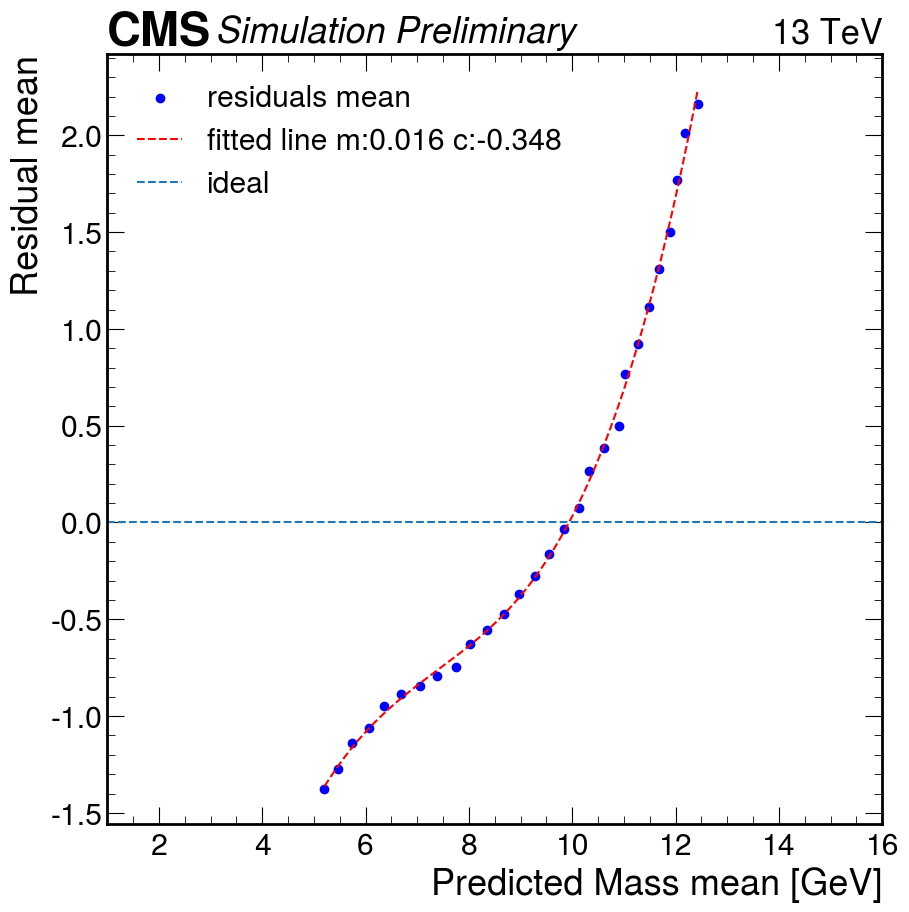

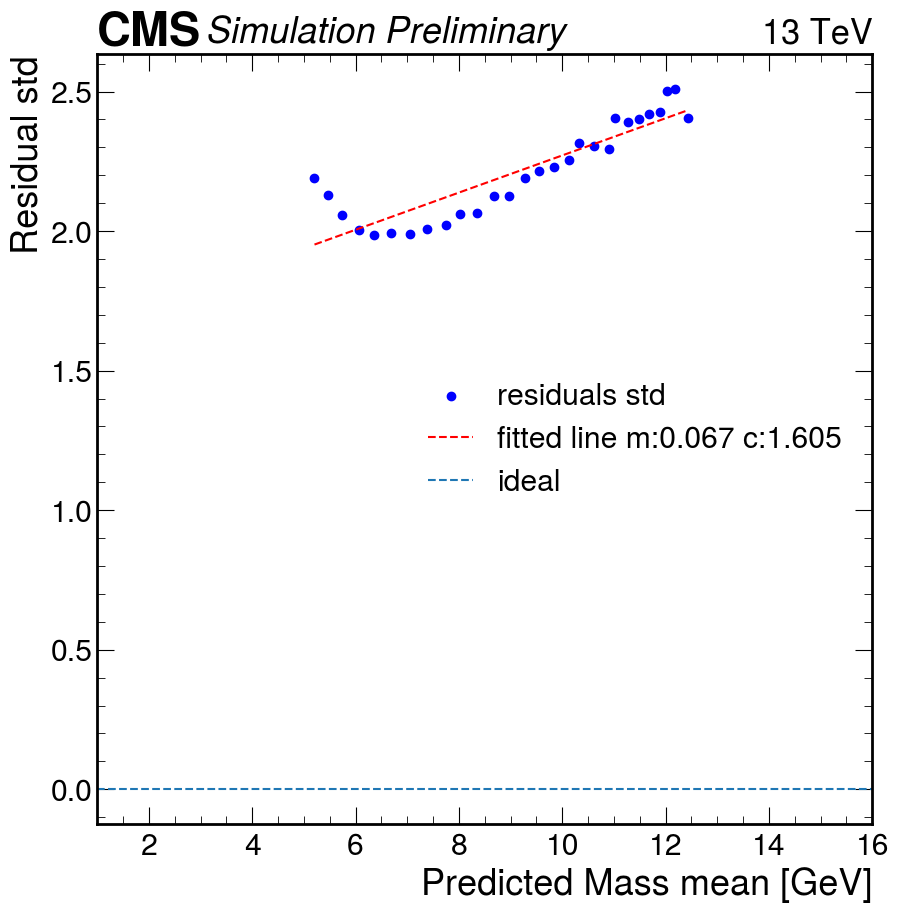

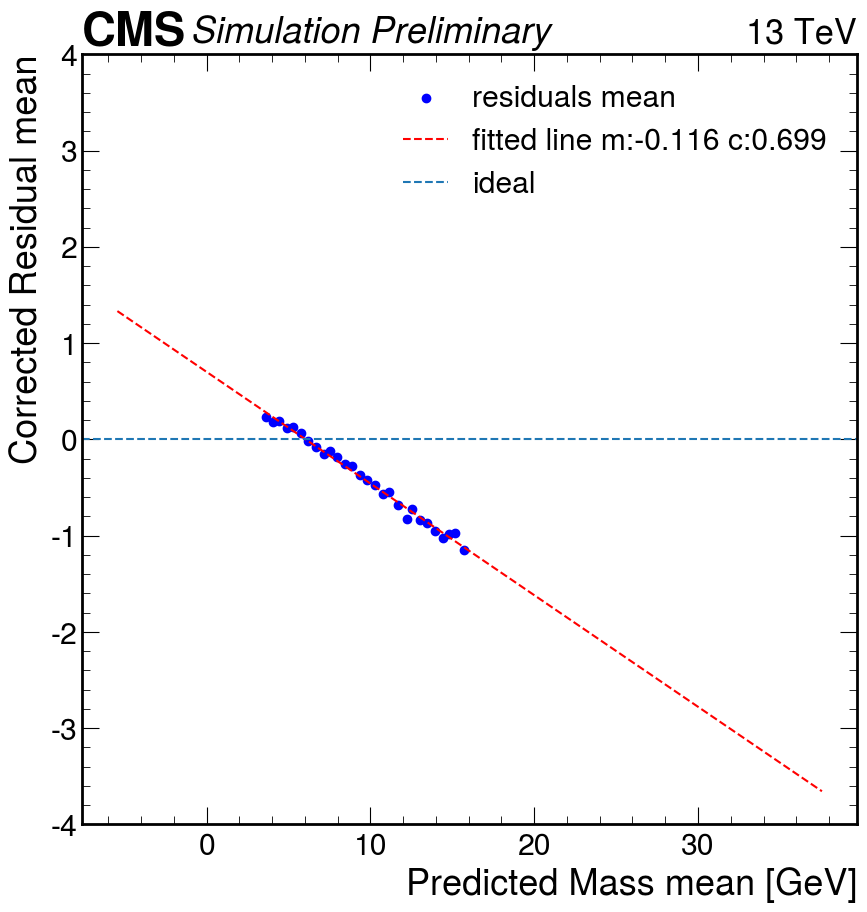

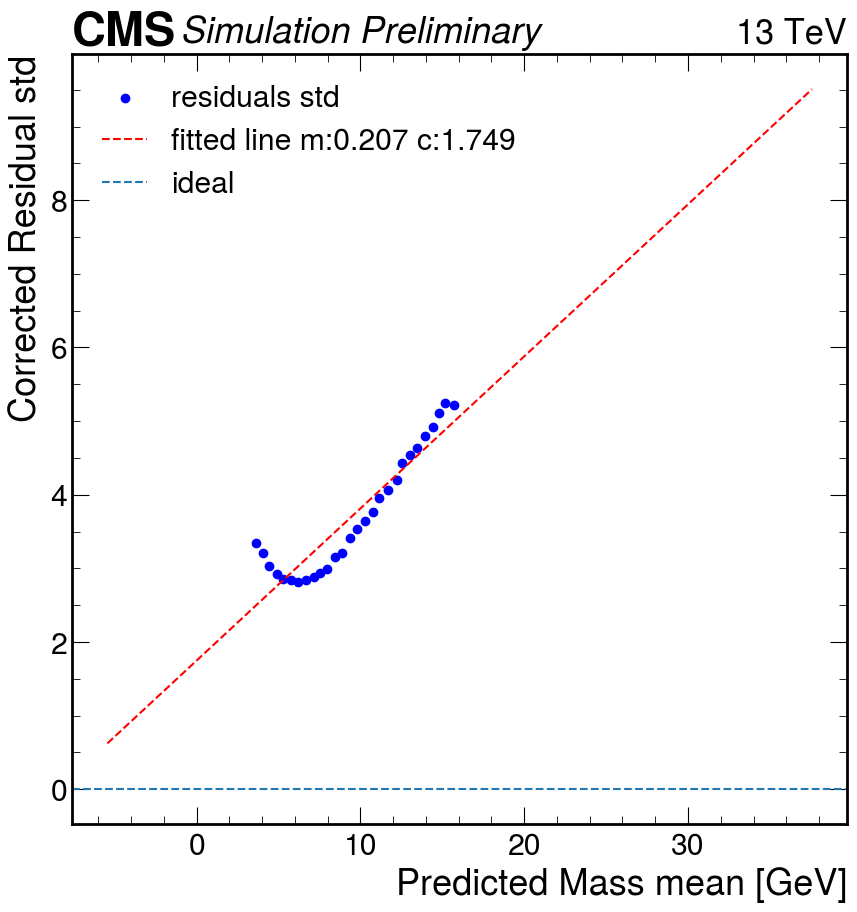

In [27]:
degree_mean = 3
degree_std = 1
file_in ='../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/13_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs15_BatchSize1024_from1_ntrain5296128_nval596992_run0/epoch10_val_pseudoscalar_mae1.8745_inference_data.pkl'



infile = open(f"{file_in}", "rb")
data = pickle.load(infile)
infile.close()

m_true_=data["m_true"]
m_pred_=data["m_pred"]
m_true = np.concatenate(m_true_).flatten()
m_pred = np.concatenate(m_pred_).flatten() 

bins=np.arange(3.6,14.9,0.4)
mean_pred_bins = []
mean_true_bins =[]
residuals_mean = []
residuals_std = []
for i in range(len(bins)-1):
    temp_mass_pred = m_pred[(m_true >= bins[i]) & (m_true< bins[i+1])]
    temp_mean_mass_pred = np.mean(temp_mass_pred)
    mean_pred_bins.append(temp_mean_mass_pred)
    temp_mass_true = np.mean(m_true[(m_true >= bins[i]) & (m_true< bins[i+1])])
    mean_true_bins.append(temp_mass_true)
    temp_residual = temp_mass_true - temp_mass_pred
    mu, std = norm.fit(temp_residual)
    residuals_mean.append(mu)
    residuals_std.append(std)


fig, ax = plt.subplots()   
coeff_mean = np.polyfit(mean_pred_bins, residuals_mean, degree_mean)
polynomial_mean = np.poly1d(coeff_mean)
x = np.linspace(min(mean_pred_bins),max(mean_pred_bins), num=1000)
y_fit_mean = polynomial_mean(x)
plt.scatter(mean_pred_bins, residuals_mean,color='b',marker='o',label='residuals mean')
plt.plot(x,y_fit_mean, color='r',linestyle='--', label = f"fitted line m:{coeff_mean[0]:.3f} c:{coeff_mean[1]:.3f}" )
plt.xlim(1,16)
plt.axhline(y=0, linestyle='--', label="ideal")
plt.xlabel("Predicted Mass mean [GeV]")
plt.ylabel("Residual mean")
plt.legend()
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.show() 


coeff_std = np.polyfit(mean_pred_bins, residuals_std, degree_std)
polynomial_std = np.poly1d(coeff_std)
y_fit_std = polynomial_std(x)
fig, ax = plt.subplots()
plt.scatter(mean_pred_bins,residuals_std,color='b',marker='o',label='residuals std')
plt.plot(x,y_fit_std, color='r',linestyle='--', label = f"fitted line m:{coeff_std[0]:.3f} c:{coeff_std[1]:.3f}" )
plt.xlim(1,16)
plt.axhline(y=0, linestyle='--', label="ideal")
plt.xlabel("Predicted Mass mean [GeV]")
plt.ylabel("Residual std")
plt.legend()
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.show() 






def corrected_pred(m):
    mass = m + polynomial_mean(m)
    return mass

file_in ='../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/13_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs15_BatchSize1024_from1_ntrain5296128_nval596992_run0/epoch10_val_pseudoscalar_mae1.8745_inference_data.pkl'



infile = open(f"{file_in}", "rb")
data = pickle.load(infile)
infile.close()

m_true_=data["m_true"]
m_pred_=data["m_pred"]
m_true = np.concatenate(m_true_).flatten()
m_pred = corrected_pred(np.concatenate(m_pred_).flatten()) 

bins=np.arange(3.6,14.9,0.4)
mean_pred_bins = []
mean_true_bins =[]
residuals_mean = []
residuals_std = []
for i in range(len(bins)-1):
    temp_mass_pred = m_pred[(m_true >= bins[i]) & (m_true< bins[i+1])]
    temp_mean_mass_pred = np.mean(temp_mass_pred)
    mean_pred_bins.append(temp_mean_mass_pred)
    temp_mass_true = np.mean(m_true[(m_true >= bins[i]) & (m_true< bins[i+1])])
    mean_true_bins.append(temp_mass_true)
    temp_residual = temp_mass_true - temp_mass_pred
    mu, std = norm.fit(temp_residual)
    residuals_mean.append(mu)
    residuals_std.append(std)

coeff_mean1 = np.polyfit(mean_pred_bins, residuals_mean, 1)
polynomial_mean1 = np.poly1d(coeff_mean1)
x = np.linspace(min(m_pred),max(m_pred), num=1000)
y_fit_mean1 = polynomial_mean1(x)

fig, ax = plt.subplots() 
plt.scatter(mean_pred_bins, residuals_mean,color='b',marker='o',label='residuals mean')
plt.plot(x,y_fit_mean1, color='r',linestyle='--', label = f"fitted line m:{coeff_mean1[0]:.3f} c:{coeff_mean1[1]:.3f}" )
plt.ylim(-4,4)
plt.axhline(y=0, linestyle='--', label="ideal")
plt.xlabel("Predicted Mass mean [GeV]")
plt.ylabel("Corrected Residual mean")
plt.legend()
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.show() 


coeff_std1 = np.polyfit(mean_pred_bins, residuals_std, 1)
polynomial_std1 = np.poly1d(coeff_std1)
y_fit_std1 = polynomial_std1(x)
fig, ax = plt.subplots()
plt.scatter(mean_pred_bins,residuals_std,color='b',marker='o',label='residuals std')
plt.plot(x,y_fit_std1, color='r',linestyle='--', label = f"fitted line m:{coeff_std1[0]:.3f} c:{coeff_std1[1]:.3f}" )
plt.axhline(y=0, linestyle='--', label="ideal")
plt.xlabel("Predicted Mass mean [GeV]")
plt.ylabel("Corrected Residual std")
plt.legend()
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.show() 


### After corection

In [16]:
slope = 0.438
c =-3.967
def corrected_pred(m):
    mass = m + polynomial_mean(m)
    return mass

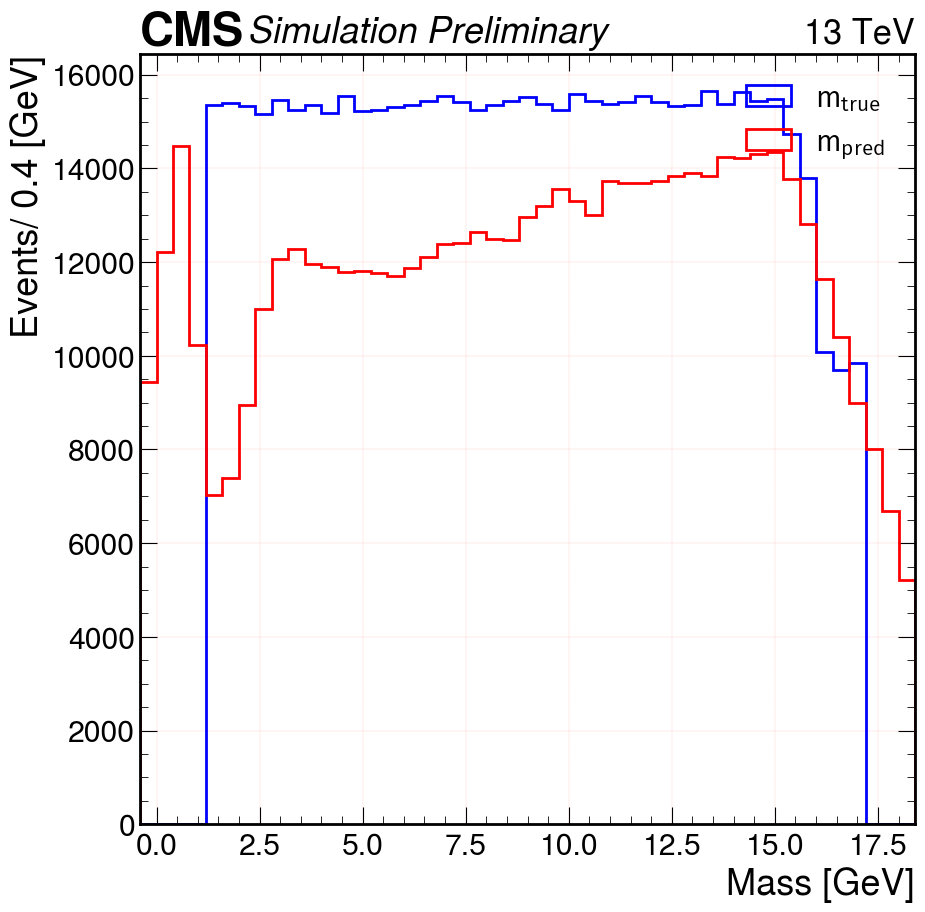

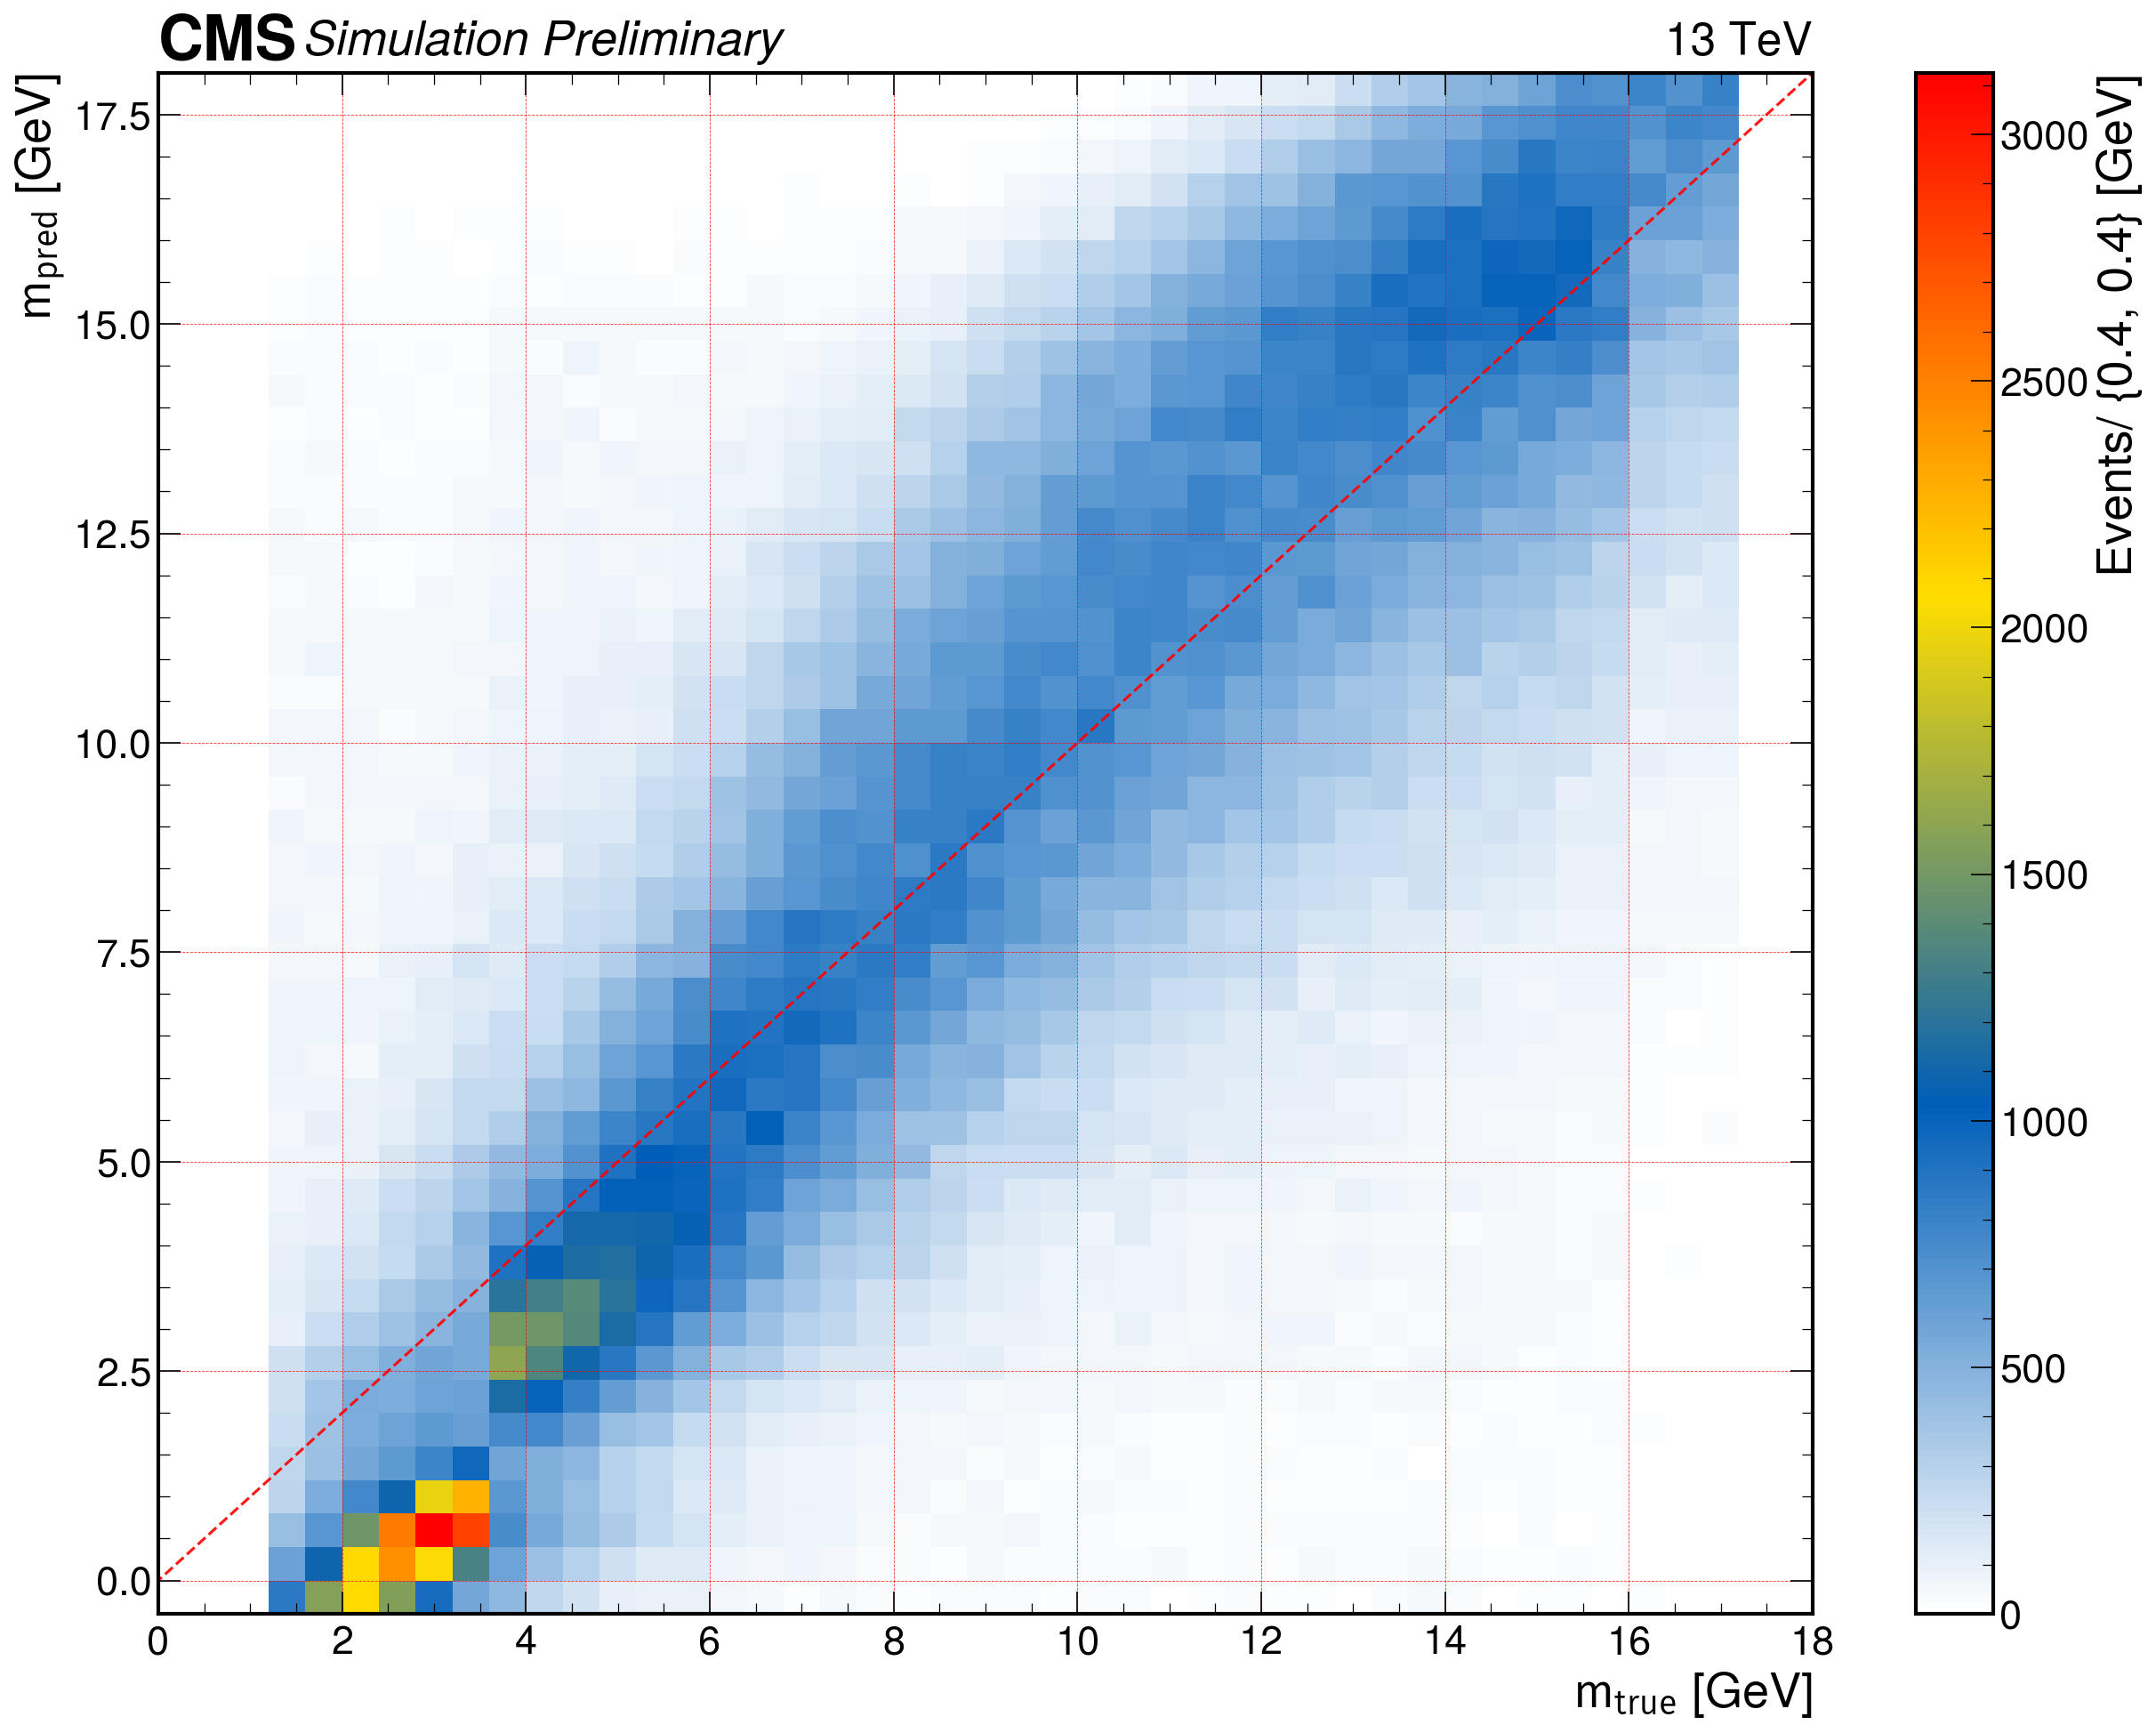

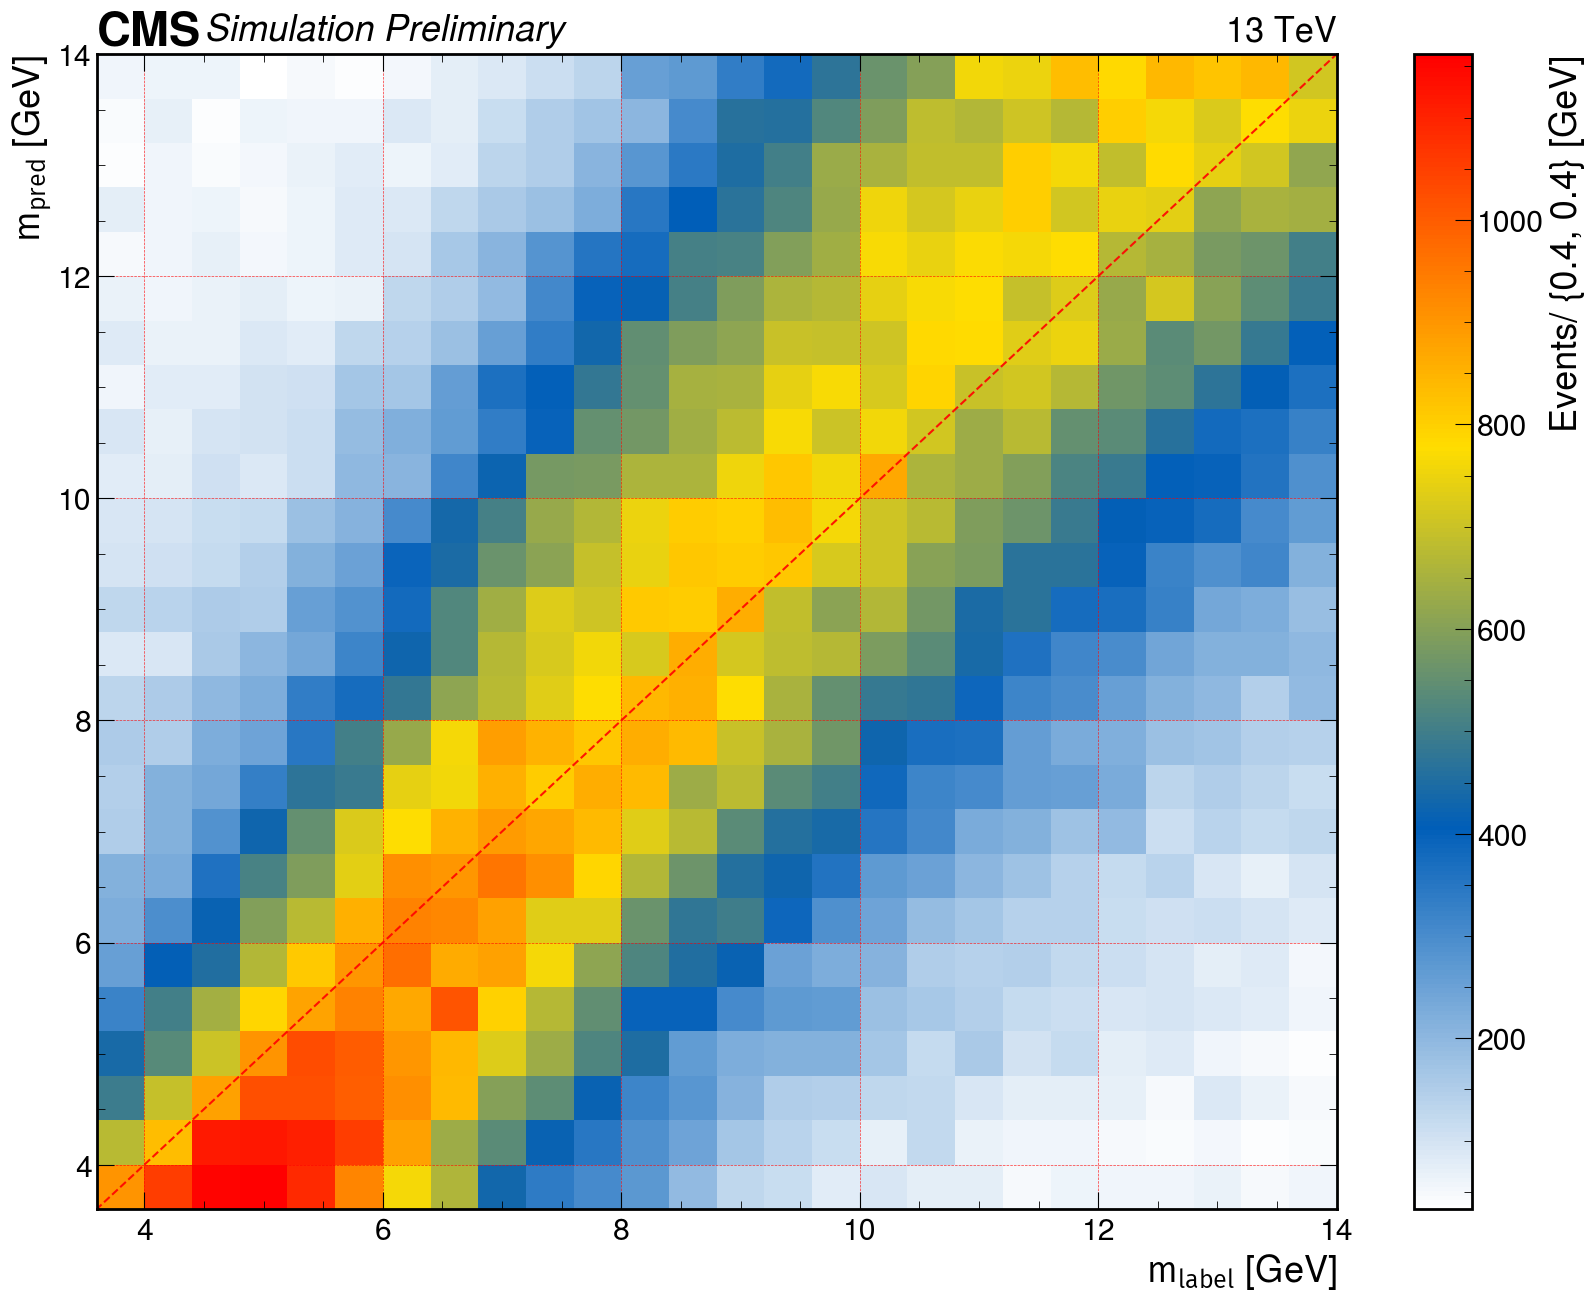

In [17]:
plot_validation(corrected=True)

Signal Mass :  14


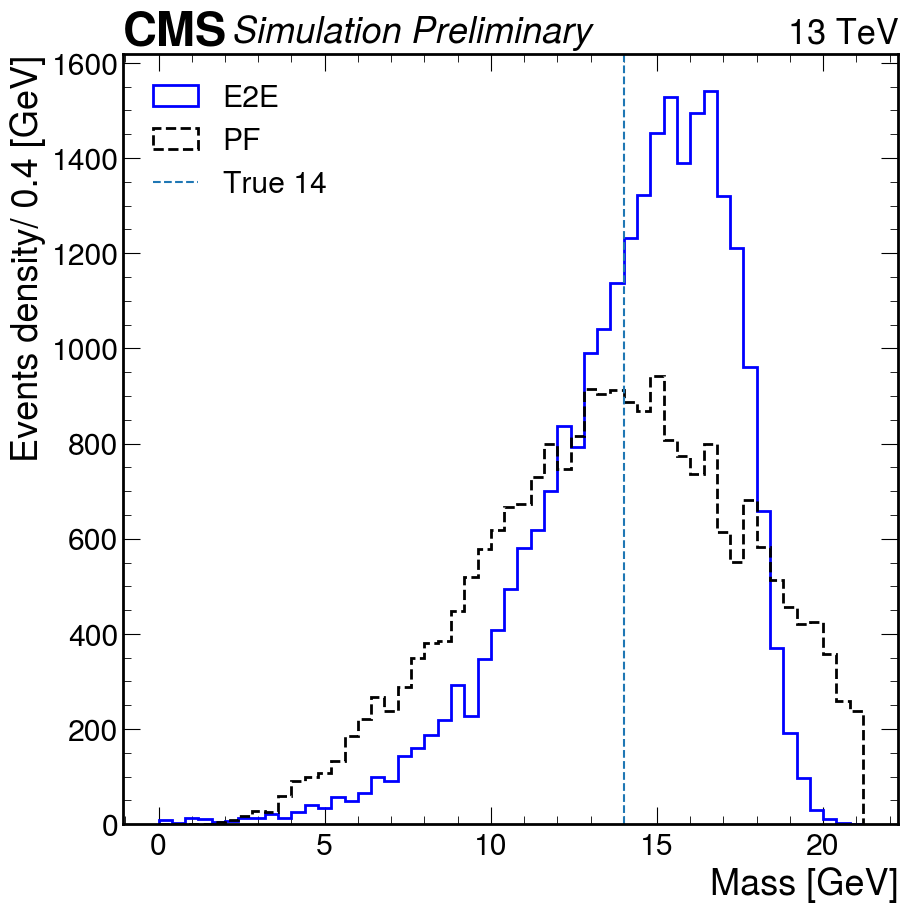

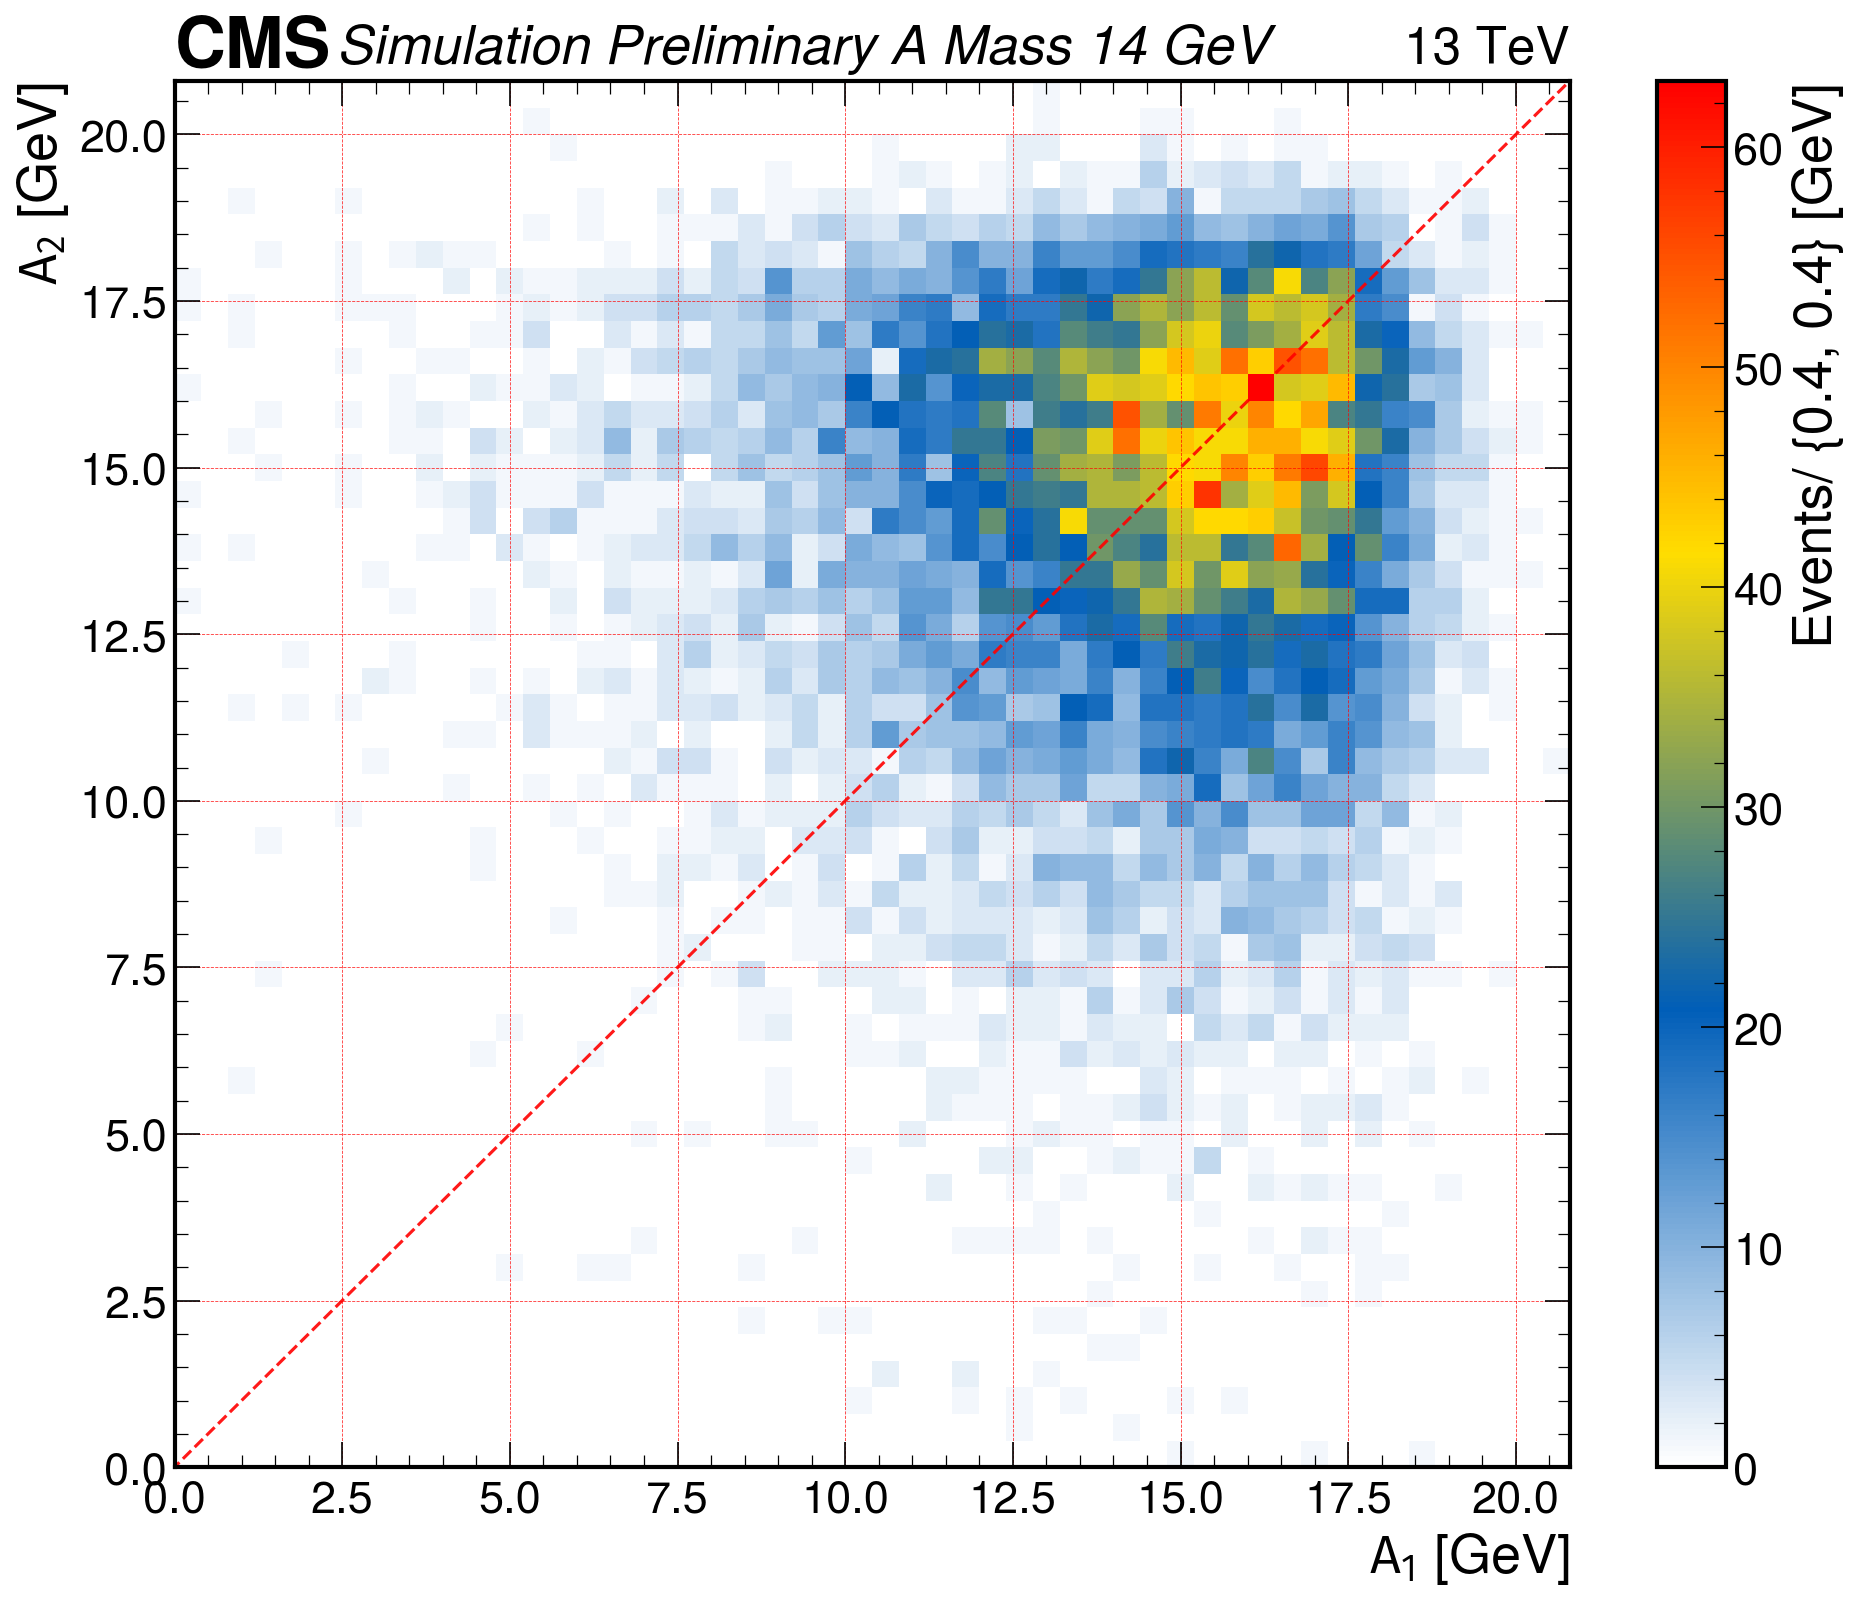

In [25]:
plot_signal('14', True)
# plot_signal('4',False)